# Panel de Visualización de datos AirBnB Sidney

## Herramienta para el análisis, visualización y predicción de datos de alquileres de piso para uso vacacional en la ciudad de Sidney (Australia).

* **Instalación de paquetes**

In [1]:
#pip install statsmodels

In [2]:
#pip install streamlit_folium

In [3]:
#pip install streamlit

In [4]:
#pip install pingouin

In [5]:
#pip install io

## 1. Importar librerías a utilizar en el análisis de datos y visualización

In [6]:
#Llamado de librerías para EDA y visualización de datos.
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools as it
import streamlit as st
from streamlit_folium import st_folium
import folium as folium    
from scipy import stats

In [7]:
#Instalación de librerías para análisis estadístico

import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

## 2. Importar base de datos .CSV y asignación a un DataFrame

In [8]:
pd.read_csv ('sydney_airbnb.csv')

df = pd.read_csv ('sydney_airbnb.csv')
df.head (2)

id                               name  host_id host_name  \
0  12351  Sydney City & Harbour at the door    17061    Stuart   
1  14250                Manly Harbour House    55948     Heidi   

   neighbourhood_group neighbourhood   latitude   longitude        room_type  \
0                  NaN        Sydney -33.865153  151.191896     Private room   
1                  NaN         Manly -33.800929  151.261722  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    100               2                493  2018-11-21               4.83   
1    471               5                  1  2016-01-02               0.03   

   calculated_host_listings_count  availability_365  
0                               2               187  
1                               2               321

## 3. Exploración inicial de datos

> ### 3.1. Tipo de objetos (int,string, object, boolean, range).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36662 non-null  int64  
 1   name                            36650 non-null  object 
 2   host_id                         36662 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36662 non-null  object 
 6   latitude                        36662 non-null  float64
 7   longitude                       36662 non-null  float64
 8   room_type                       36662 non-null  object 
 9   price                           36662 non-null  int64  
 10  minimum_nights                  36662 non-null  int64  
 11  number_of_reviews               36662 non-null  int64  
 12  last_review                     

* La base de datos tiene un total de  **36662 entradas** en **16 columnas**: **11 numéricas** y **5 cadenas de texto**.

* Tenemos pérdida de datos en "last_review" y "review_month".

* La columna neighbourhood_group está vacía, debemos analizar si eliminarla.



> ### 3.2. Información de filas.

* **Primeras filas** `.head`

Visualizamos las primeras 10 filas.

In [10]:
df.head (10)

id                                               name  host_id  \
0  12351                  Sydney City & Harbour at the door    17061   
1  14250                                Manly Harbour House    55948   
2  15253  Stunning Penthouse Apartment In Heart Of The City    59850   
3  20865                 3 BED HOUSE + 1 BED STUDIO Balmain    64282   
4  26174                 COZY PRIVATE ROOM, GREAT LOCATION!   110561   
5  38073                Modern apartment with pool and wifi   103476   
6  39348                                 Large Bondi studio   168828   
7  44545             Sunny Darlinghurst Warehouse Apartment   112237   
8  45440  Rubys @ Bondi Beach! Huge beachhouse on the be...   201611   
9  56842    Beach Breeze 2 BDR + Double balcony+ LOCATION !   113874   

                   host_name  neighbourhood_group neighbourhood   latitude  \
0                     Stuart                  NaN        Sydney -33.865153   
1                      Heidi                  NaN         Manly -33.800929   
2                      Morag                  NaN        Sydney -33.880455   
3                      Fiona                  NaN    Leichhardt -33.859072   
4                     Amanda                  NaN     Woollahra -33.889087   
5                     Connie                  NaN  North Sydney -33.834429   
6                      Marie                  NaN      Waverley -33.884821   
7                      Atari                  NaN        Sydney -33.879956   
8                    Deborah                  NaN      Waverley -33.889087   
9  Bondi Beach Holiday Homes                  NaN      Waverley -33.889633   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0  151.191896     Private room    100               2                493   
1  151.261722  Entire home/apt    471               5                  1   
2  151.216541     Private room    109               2                300   
3  151.172753  Entire home/apt    450               7                 15   
4  151.259404     Private room     62               1                 42   
5  151.208875  Entire home/apt    159               2                 63   
6  151.282945  Entire home/apt     84               5                  6   
7  151.215528  Entire home/apt    130               5                 53   
8  151.274506  Entire home/apt    700               3                 54   
9  151.283553  Entire home/apt    226               2                 17   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-11-21               4.83                               2   
1  2016-01-02               0.03                               2   
2  2018-11-16               3.63                               2   
3  2018-01-07               0.18                               1   
4  2018-11-23               0.45                               1   
5  2017-09-16               0.64                               1   
6  2018-11-17               0.77                               2   
7  2018-11-05               0.54                               1   
8  2018-10-23               0.88                              10   
9  2018-11-25               0.24                              53   

   availability_365  
0               187  
1               321  
2               316  
3                69  
4               140  
5               321  
6               194  
7                 1  
8               301  
9                 0

##### * **Últimas filas** `.tail`

Visualizamos las últimas 2 filas.

In [11]:
df.tail (2)

id                                              name    host_id  \
36660  30592505    Bright Modern apartment in a Premiere location  229479027   
36661  30593866  Huge Sunny Double Room with Spa in Best Location   51138070   

             host_name  neighbourhood_group neighbourhood   latitude  \
36660   Sofei & Kelvin                  NaN      Rockdale -33.929960   
36661  Aaron & Natalie                  NaN        Sydney -33.906938   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
36660  151.150659  Entire home/apt    170               2                  0   
36661  151.211255     Private room     80               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
36660         NaN                NaN                               1   
36661         NaN                NaN                               3   

       availability_365  
36660                89  
36661                11

> ### 3.3. Datos nulos (conteo e identificación): `.isnull()`

In [12]:
df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood_group               36662
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11937
reviews_per_month                 11937
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* Tenemos pérdida de datos en **4 variables o columnas**: *name*, *host_name* ,*last_review* y *review_month*.

* Hay **1 columna vacía** *neighbourhood_group*, debemos analizar si eliminarla.

> ### 3.4. Datos duplicados (conteo e identificación): `.duplicated`

In [13]:
#datos duplicados en toda el DataFrame
df_dup = df[df.duplicated()]
len(df_dup)

0

También podemos ver los duplicados por columna:

In [14]:
dup_name = df[df.name.duplicated()]
len(dup_name)

804

In [15]:
dup_hostname = df[df.host_name.duplicated()]
len(dup_hostname)

28787

* También podemos ver los valores por cada columna, por ejemplo por *neighbourhood* con `.value_counts` `.unique()`


In [16]:
neighbourhood_value = df.neighbourhood.value_counts ()
neighbourhood_value

Sydney              9241
Waverley            5467
Randwick            3346
Manly               1800
Warringah           1794
Woollahra           1573
North Sydney        1370
Marrickville        1252
Pittwater           1192
Leichhardt           999
Rockdale             729
Botany Bay           600
Ryde                 575
Mosman               534
Parramatta           520
Willoughby           500
Auburn               469
Sutherland Shire     468
Canada Bay           449
Hornsby              391
Ku-Ring-Gai          340
Canterbury           339
Ashfield             306
Lane Cove            289
The Hills Shire      260
Burwood              249
Blacktown            237
Hurstville           195
Bankstown            180
City Of Kogarah      179
Strathfield          171
Penrith              132
Holroyd              125
Liverpool            116
Campbelltown         101
Fairfield             76
Hunters Hill          69
Camden                29
Name: neighbourhood, dtype: int64

> ### 3.5. Nombre y tipo de variables (columnas).

* Las variables numéricas se pueden analizar con **estadísticas de datos agrupados** por subconjuntos o atributos de nuestros datos.

* Podemos calcular algunas **estadísticas básicas por columna** usando el comando `.describe()`

* Las variables categóricas se pueden analizar inicialmente con diagramas de **cajas y bigotes**.

In [17]:
# Variables Categóricas
categoricas = ["id", "host_id", "name", "host_name", "neighbourhood", "room_type", "last_review"] 

# Variables numéricas
numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

## 4. Ingeniería de características

> ### 4.1. Eliminación de *Datos Nulos*

* Borramos la columna inservible *"neighbourhood_group"*

In [18]:
df_filtrado=df.drop( ["neighbourhood_group"] ,axis = 1 )
df_filtrado.head (5)

id                                               name  host_id  \
0  12351                  Sydney City & Harbour at the door    17061   
1  14250                                Manly Harbour House    55948   
2  15253  Stunning Penthouse Apartment In Heart Of The City    59850   
3  20865                 3 BED HOUSE + 1 BED STUDIO Balmain    64282   
4  26174                 COZY PRIVATE ROOM, GREAT LOCATION!   110561   

  host_name neighbourhood   latitude   longitude        room_type  price  \
0    Stuart        Sydney -33.865153  151.191896     Private room    100   
1     Heidi         Manly -33.800929  151.261722  Entire home/apt    471   
2     Morag        Sydney -33.880455  151.216541     Private room    109   
3     Fiona    Leichhardt -33.859072  151.172753  Entire home/apt    450   
4    Amanda     Woollahra -33.889087  151.259404     Private room     62   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                493  2018-11-21               4.83   
1               5                  1  2016-01-02               0.03   
2               2                300  2018-11-16               3.63   
3               7                 15  2018-01-07               0.18   
4               1                 42  2018-11-23               0.45   

   calculated_host_listings_count  availability_365  
0                               2               187  
1                               2               321  
2                               2               316  
3                               1                69  
4                               1               140

In [19]:
df_filtrado['price'].describe()

count    36662.000000
mean       207.689597
std        323.818795
min          0.000000
25%         80.000000
50%        136.000000
75%        223.000000
max      14999.000000
Name: price, dtype: float64

* También podemos extraer una métrica en particular:`.min()`  `.max()` `.mean()` `.mean()` `.std()` `.count()`

In [20]:
df_filtrado['price'].min()

0

In [21]:
df_filtrado['price'].max()

14999

In [22]:
df_filtrado['price'].mean()

207.6895968577819

In [23]:
df_filtrado['price'].std()

323.8187946316524

In [24]:
df_filtrado['price'].count()

36662

> ### 4.2. Detección de *Outliers*

#### Detección gráfica y con Zscore de valores atípicos

* Se hizo una primera detección de *outliers* de manera visual a través de las gráficas de dispersión de datos y boxplots.
* A continuacion se realizaron gráficos más específicos para la detección de *outliers*

* Gráfico outliers
* Box plot horizontal
* Zscore

- Detección gráfica y con Zscore de outliers de `"price"`

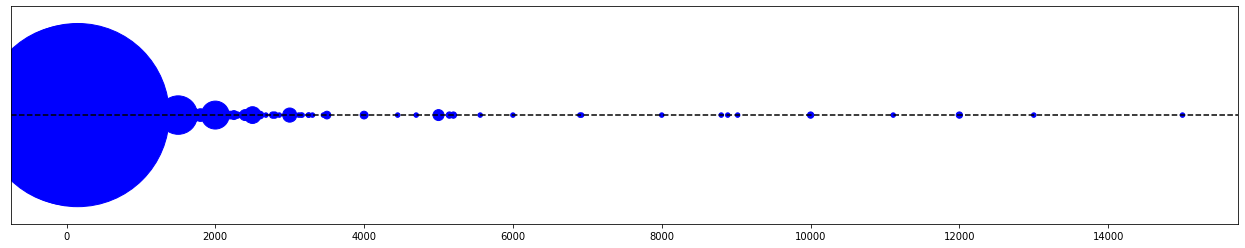

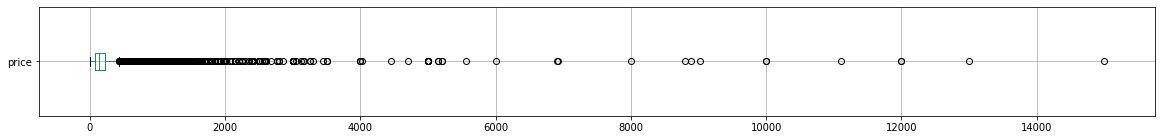

-Se detecta con Zscore > 3, valor de outliers para 'price' a partir de:


1179

In [25]:
price = df_filtrado.iloc[:, 8]
price_unique, counts = np.unique(price, return_counts=True)
 
sizes = counts*20
colors = ['blue']*len(price_unique)

plt.figure(figsize=(22,4))
plt.axhline(1, color='k', linestyle='--')
plt.scatter(price_unique, np.ones(len(price_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

df.boxplot(column='price', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > 3, valor de outliers para 'price' a partir de:")
df_filtrado1 = df_filtrado[(np.abs(stats.zscore(df_filtrado["price"])) < 3)]
df_filtrado1['price'].max()

- Detección gráfica y con Zscore de outliers de `"minimum_nights"`

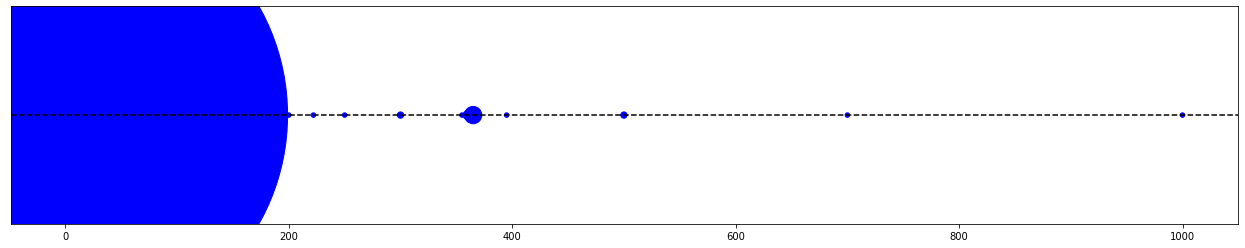

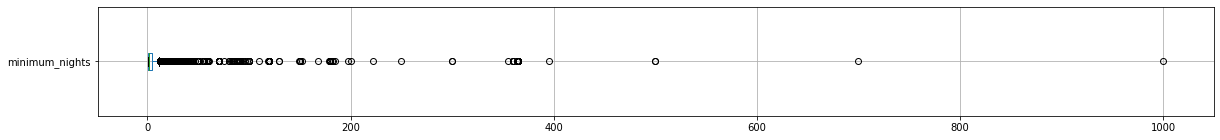

-Se detecta con Zscore > 3, valor de outliers para 'minimum_nights' a partir de:


51

In [26]:
minimum_nights = df_filtrado.iloc[:, 9]
minimum_nights_unique, counts = np.unique(minimum_nights, return_counts=True)
 
sizes = counts*20
colors = ['blue']*len(minimum_nights_unique)

plt.figure(figsize=(22,4))
plt.axhline(1, color='k', linestyle='--')
plt.scatter(minimum_nights_unique, np.ones(len(minimum_nights_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

df.boxplot(column='minimum_nights', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > 3, valor de outliers para 'minimum_nights' a partir de:")
df_filtrado2 = df_filtrado[(np.abs(stats.zscore(df_filtrado["minimum_nights"])) < 3)]
df_filtrado2['minimum_nights'].max()

- Detección gráfica y con Zscore de outliers de `"number_of_reviews"`

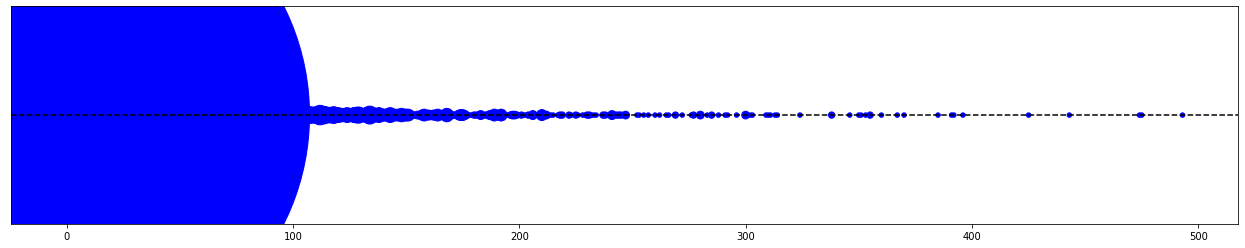

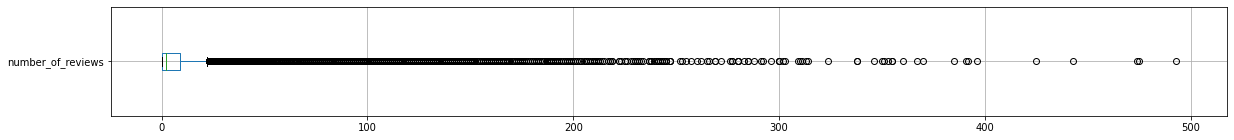

-Se detecta con Zscore > 3, valor de outliers para 'number_of_reviews' a partir de:


98

In [27]:
number_of_reviews = df_filtrado.iloc[:, 10]
number_of_reviews_unique, counts = np.unique(number_of_reviews, return_counts=True)
 
sizes = counts*20
colors = ['blue']*len(number_of_reviews_unique)

plt.figure(figsize=(22,4))
plt.axhline(1, color='k', linestyle='--')
plt.scatter(number_of_reviews_unique, np.ones(len(number_of_reviews_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

df.boxplot(column='number_of_reviews', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > 3, valor de outliers para 'number_of_reviews' a partir de:")
df_filtrado3 = df_filtrado[(np.abs(stats.zscore(df_filtrado["number_of_reviews"])) < 3)]
df_filtrado3['number_of_reviews'].max()

- Detección gráfica y con Zscore de outliers de `"reviews_per_month"`

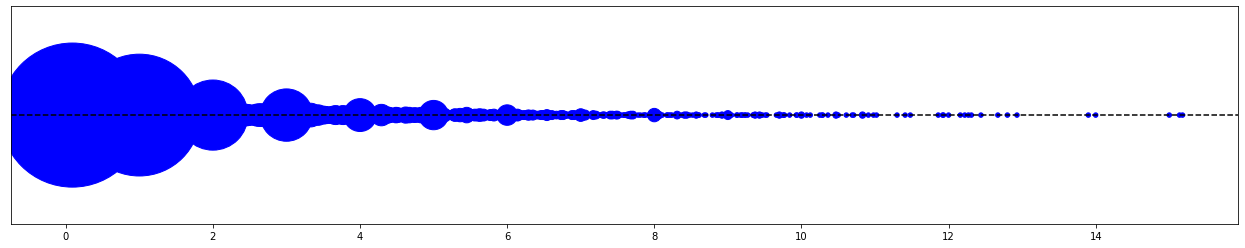

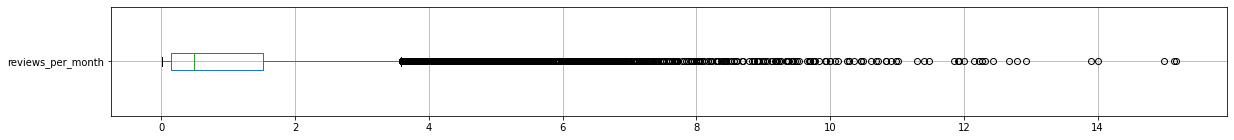

-Se detecta con Zscore > 3, valor de outliers para 'reviews_per_month' a partir de:


nan

In [28]:
reviews_per_month = df_filtrado.iloc[:, 12]
reviews_per_month_unique, counts = np.unique(reviews_per_month, return_counts=True)
 
sizes = counts*20
colors = ['blue']*len(reviews_per_month_unique)

plt.figure(figsize=(22,4))
plt.axhline(1, color='k', linestyle='--')
plt.scatter(reviews_per_month_unique, np.ones(len(reviews_per_month_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

df.boxplot(column='reviews_per_month', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > 3, valor de outliers para 'reviews_per_month' a partir de:")
df_filtrado4 = df_filtrado[(np.abs(stats.zscore(df_filtrado["reviews_per_month"])) < 3)]
df_filtrado4['reviews_per_month'].max()

-No se puede utitlizar el Zscore porque la columna contiene gran catidad de nulos

- Detección gráfica y con Zscore de outliers de `"calculated_host_listings_count"`

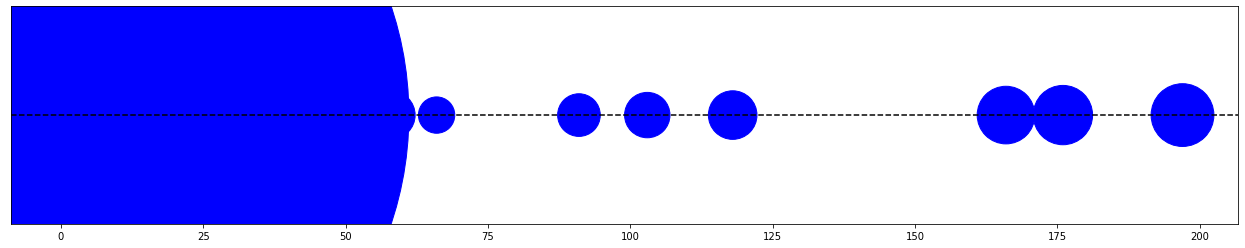

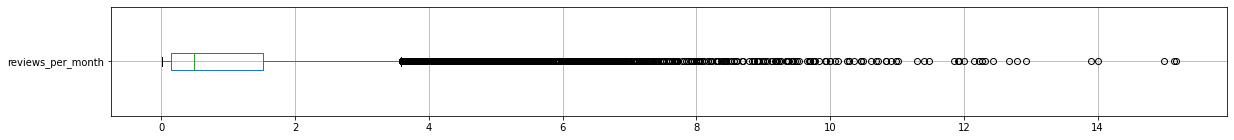

-Se detecta con Zscore > 3, valor de outliers para 'calculated_host_listings_count' a partir de:


66

In [29]:
calculated_host_listings_count = df_filtrado.iloc[:, 13]
calculated_host_listings_count_unique, counts = np.unique(calculated_host_listings_count, return_counts=True)
 
sizes = counts*20
colors = ['blue']*len(calculated_host_listings_count_unique)

plt.figure(figsize=(22,4))
plt.axhline(1, color='k', linestyle='--')
plt.scatter(calculated_host_listings_count_unique, np.ones(len(calculated_host_listings_count_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

df.boxplot(column='reviews_per_month', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > 3, valor de outliers para 'calculated_host_listings_count' a partir de:")
df_filtrado5 = df_filtrado[(np.abs(stats.zscore(df_filtrado["calculated_host_listings_count"])) < 3)]
df_filtrado5['calculated_host_listings_count'].max()

- Detección gráfica y con Zscore de outliers de `"availability_365"`

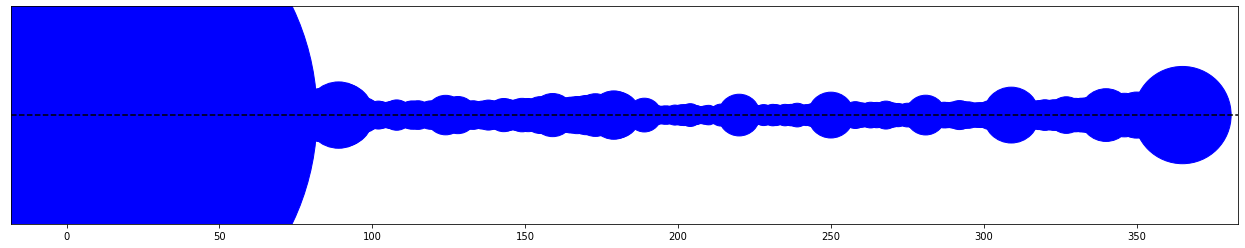

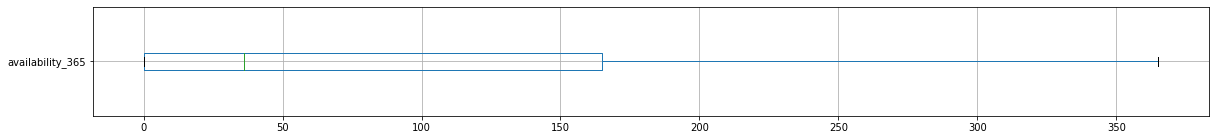

-Se detecta con Zscore > 3, valor de outliers para 'availability_365' a partir de:


365

In [30]:
availability_365 = df_filtrado.iloc[:, 14]
availability_365_unique, counts = np.unique(availability_365, return_counts=True)
 
sizes = counts*20
colors = ['blue']*len(availability_365_unique)

plt.figure(figsize=(22,4))
plt.axhline(1, color='k', linestyle='--')
plt.scatter(availability_365_unique, np.ones(len(availability_365_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

df.boxplot(column='availability_365', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > 3, valor de outliers para 'availability_365' a partir de:")
df_filtrado5 = df_filtrado[(np.abs(stats.zscore(df_filtrado["availability_365"])) < 3)]
df_filtrado5['availability_365'].max()

#### Gráficos bivariados y n-variados con df filtrado con df_fil_noches_hc

Se puede utilizar para bases de datos con muestras mayor a 20, aunque no tengan una distribución normal.

- Gráfico bivariado de `"longitude"`y `"latitude"` 

# aqui uso el DF filtrado asi que hay que decidir si bajamos esto o ponemos una nota

In [31]:
df_fil_noches_hc=df_filtrado[(df_filtrado["price"]<=1500) & 
                             (df_filtrado["minimum_nights"]<=100) & 
                             (df_filtrado["calculated_host_listings_count"]<=75)]

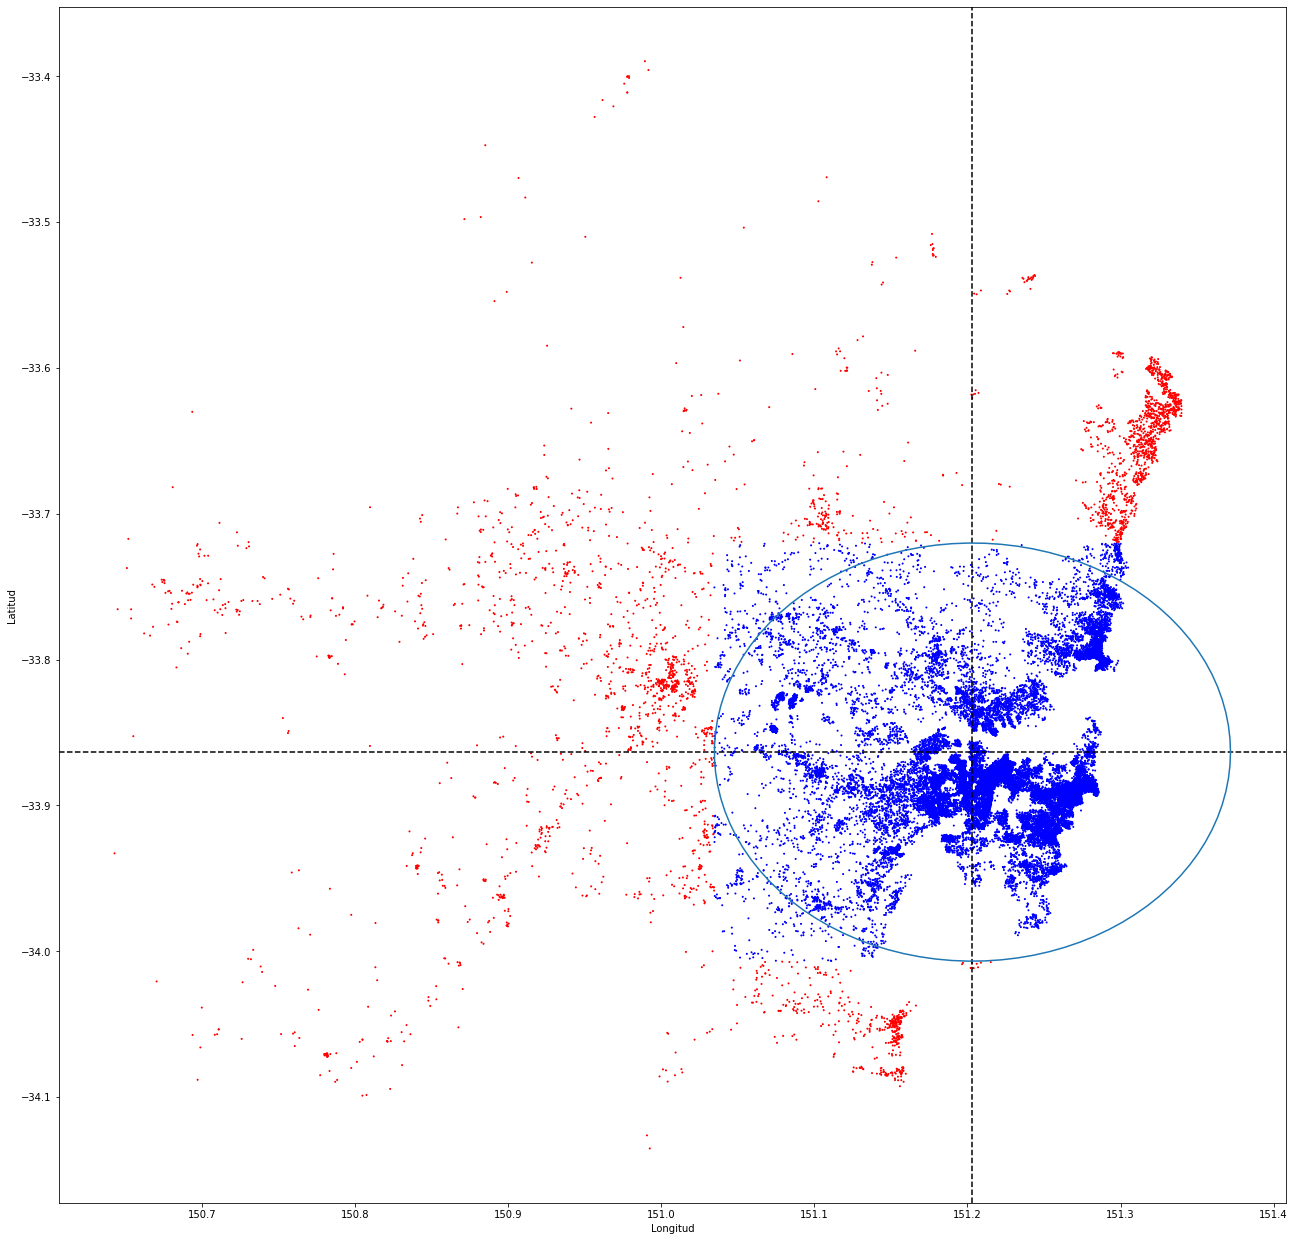

In [32]:
from math import pi
longitude = df_fil_noches_hc.iloc[:, 6]
latitude = df_fil_noches_hc.iloc[:, 5]
media = (latitude).mean()
std_x = (latitude).std()*2
media_y = (longitude).mean()
std_y = (longitude).std()*2
 
colors = ['blue']*len(latitude)
for index, x in enumerate(latitude):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(longitude):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.figure(figsize=(22,22))
plt.scatter(longitude, latitude, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

- Gráfico bivariado de `"price"`con `"longitude"`y `"latitude"` con el DataFrame sin outliers

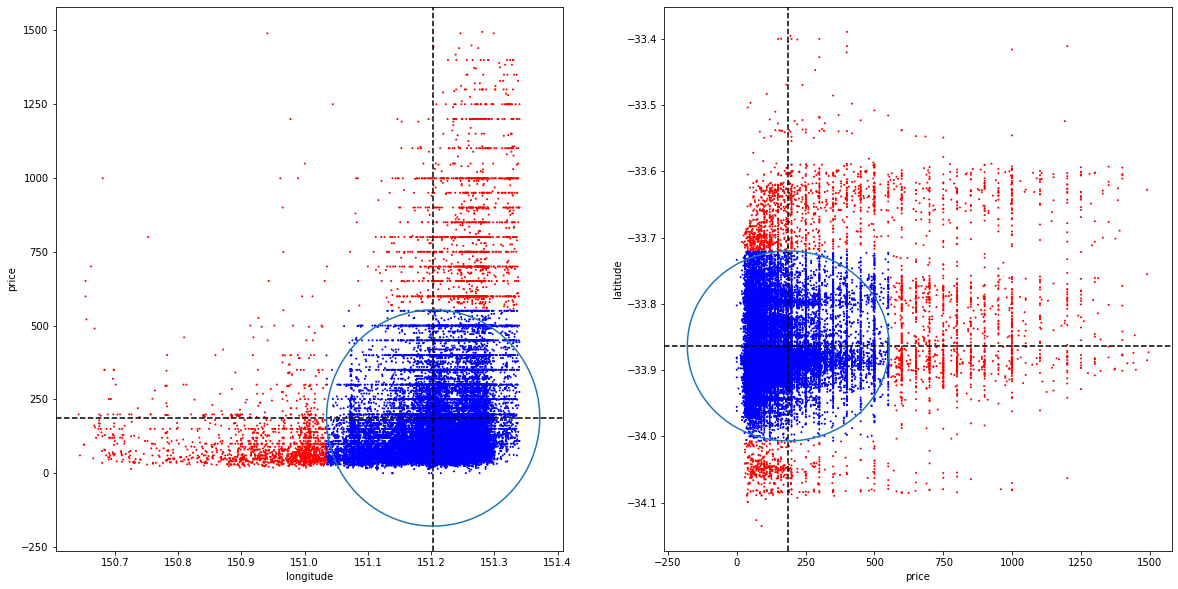

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
price = df_fil_noches_hc.iloc[:, 8]
media = (price).mean()
std_x = (price).std()*2
media_y = (longitude).mean()
std_y = (longitude).std()*2

colors = ['blue']*len(price)
for index, x in enumerate(price):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(longitude):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.subplot(1,2,1)
plt.scatter(longitude, price, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('longitude')
plt.ylabel('price')


plt.subplot(1,2,2)
media = (latitude).mean()
std_x = (latitude).std()*2
media_y = (price).mean()
std_y = (price).std()*2

colors = ['blue']*len(price)
for index, x in enumerate(latitude):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(price):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 

plt.scatter(price, latitude, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('price')
plt.ylabel('latitude')
plt.show()

-Gráficos bivariados varios

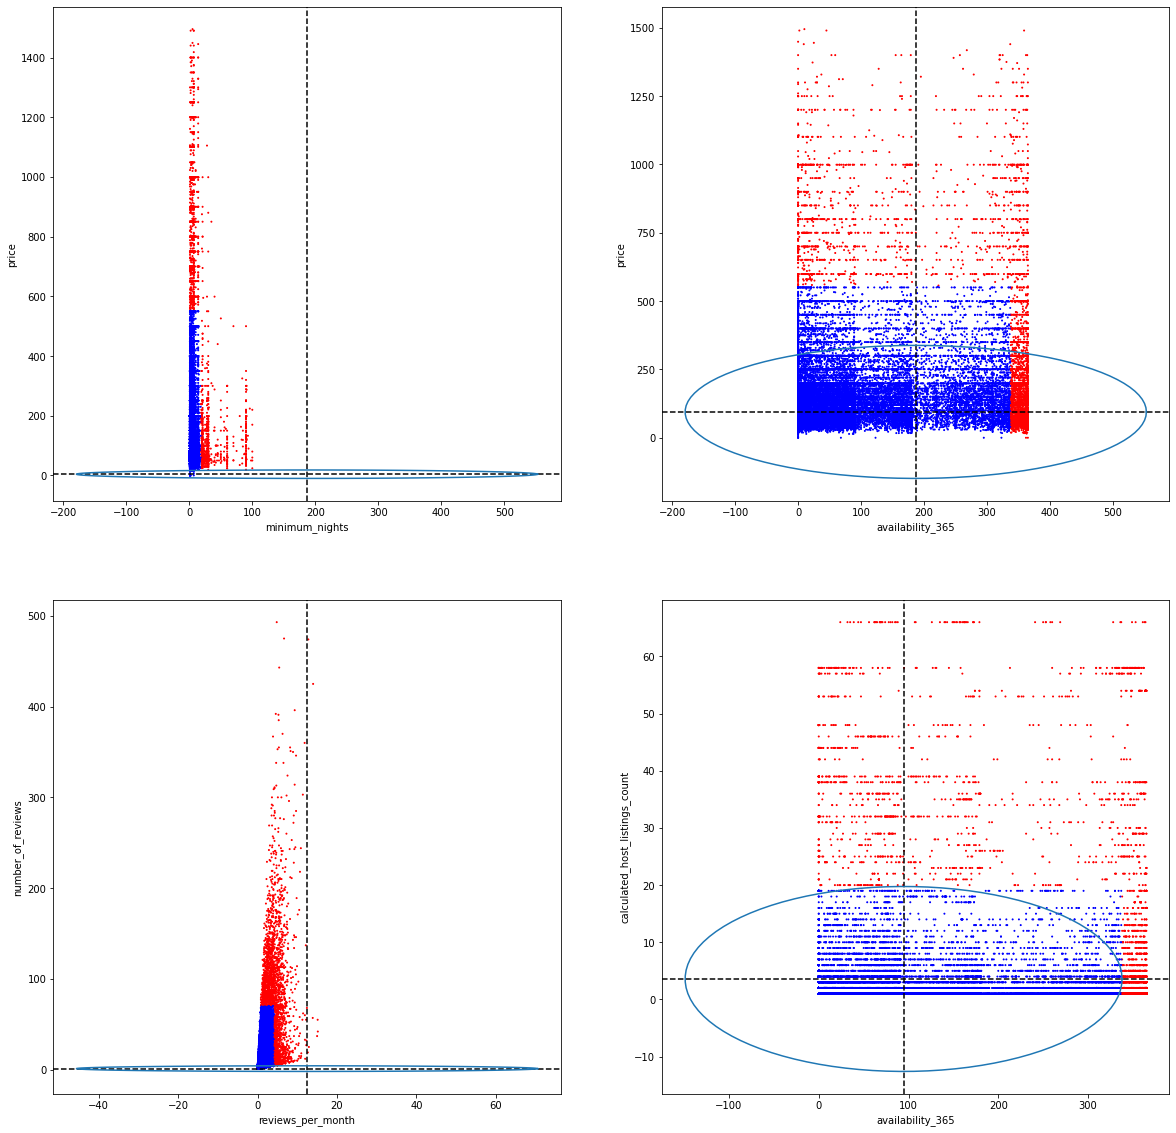

In [34]:
minimum_nights = df_fil_noches_hc.iloc[:, 9]
number_of_reviews = df_fil_noches_hc.iloc[:, 10]
reviews_per_month = df_fil_noches_hc.iloc[:, 12]
calculated_host_listings_count = df_fil_noches_hc.iloc[:, 13]
availability_365 = df_fil_noches_hc.iloc[:, 14]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

media = (minimum_nights).mean()
std_x = (minimum_nights).std()*2
media_y = (price).mean()
std_y = (price).std()*2

colors = ['blue']*len(price)
for index, x in enumerate(minimum_nights):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(price):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.subplot(2,2,1)
plt.scatter(minimum_nights, price, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('minimum_nights')
plt.ylabel('price')


media = (availability_365).mean()
std_x = (availability_365).std()*2
media_y = (price).mean()
std_y = (price).std()*2

colors = ['blue']*len(price)
for index, x in enumerate(availability_365):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(price):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.subplot(2,2,2)
plt.scatter(availability_365, price, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('availability_365')
plt.ylabel('price')


media = (reviews_per_month).mean()
std_x = (reviews_per_month).std()*2
media_y = (number_of_reviews).mean()
std_y = (number_of_reviews).std()*2

colors = ['blue']*len(reviews_per_month)
for index, x in enumerate(reviews_per_month):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(number_of_reviews):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.subplot(2,2,3)
plt.scatter(reviews_per_month, number_of_reviews, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('reviews_per_month')
plt.ylabel('number_of_reviews')


media = (calculated_host_listings_count).mean()
std_x = (calculated_host_listings_count).std()*2
media_y = (availability_365).mean()
std_y = (availability_365).std()*2

colors = ['blue']*len(calculated_host_listings_count)
for index, x in enumerate(calculated_host_listings_count):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(availability_365):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.subplot(2,2,4)
plt.scatter(availability_365, calculated_host_listings_count, s=1, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('availability_365')
plt.ylabel('calculated_host_listings_count')

plt.show()

- Gráfico n-variado de `"longitude"`, `"latitude"` y `"price"`

C:\Users\Pablo\AppData\Local\Temp\ipykernel_19444\723191964.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


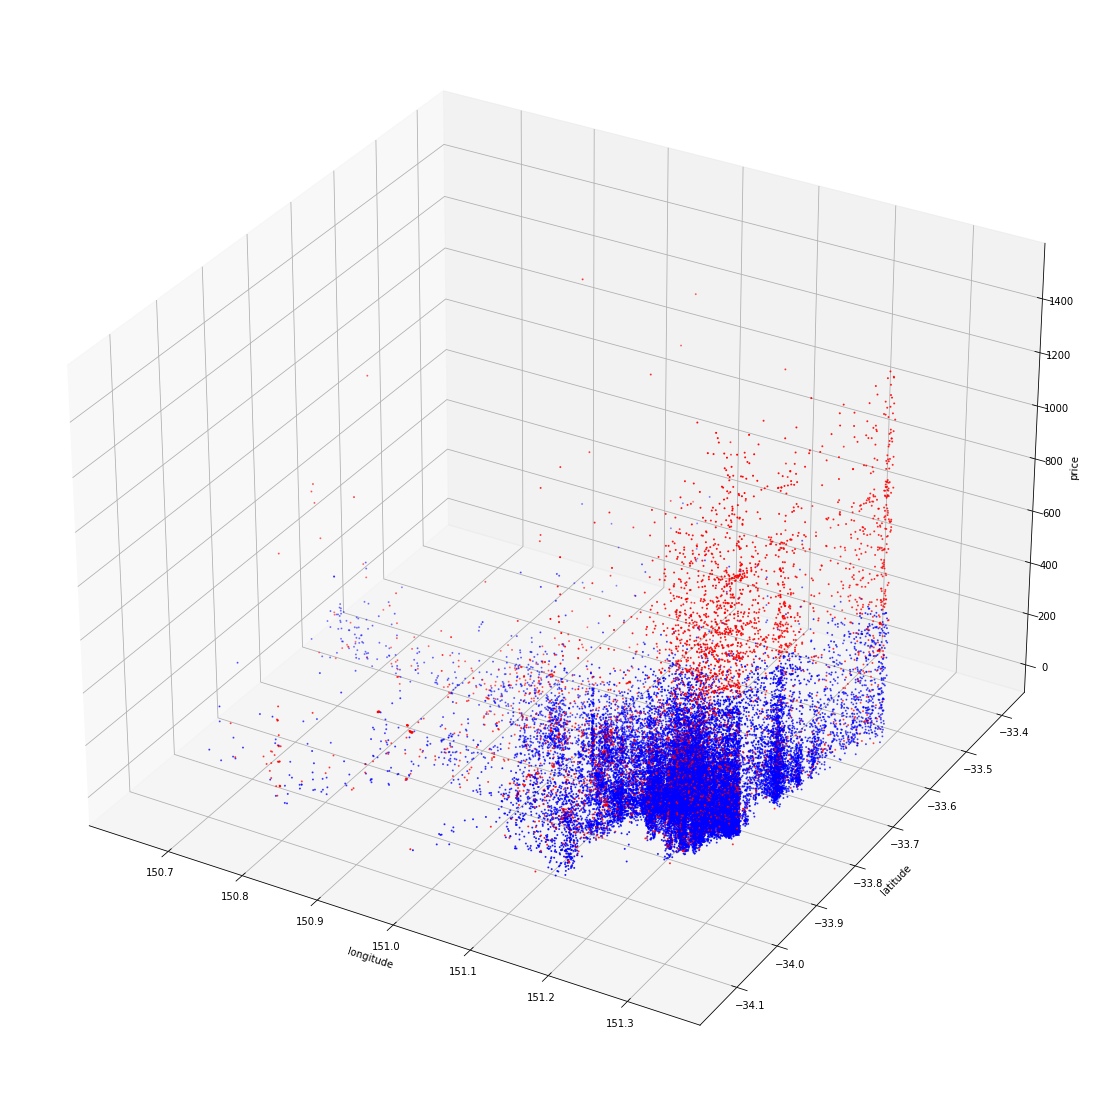

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

media_z = (price).mean()
std_z = (price).std()*2

for index, x in enumerate(price):
    if abs(x-media_z) > std_z:
        colors[index] = 'red'

ax.scatter(longitude, latitude, price, s=1, c=colors)
plt.xlabel('longitude')
plt.ylabel('latitude')
ax.set_zlabel('price')

plt.show()

#### Filtros de valores atípicos en 3 variables:

* Consenso del **rango de los valores atípicos** por cada una de las variables numéricas de nuestro interés.
* Filtros por el **rango de los valores atípicos** por variable.
* **Variables seleccionadas:**

 `minimum_nights >= 100`
 
 `calculated_host_listings_count > =75` 
 
 `price >= 1500`

* **Datos de price >=1500**

In [36]:
price_outliers=df_filtrado[df_filtrado["price"]>=1500]
price_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 28 to 36153
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              278 non-null    int64  
 1   name                            278 non-null    object 
 2   host_id                         278 non-null    int64  
 3   host_name                       278 non-null    object 
 4   neighbourhood                   278 non-null    object 
 5   latitude                        278 non-null    float64
 6   longitude                       278 non-null    float64
 7   room_type                       278 non-null    object 
 8   price                           278 non-null    int64  
 9   minimum_nights                  278 non-null    int64  
 10  number_of_reviews               278 non-null    int64  
 11  last_review                     91 non-null     object 
 12  reviews_per_month               9

* **Datos de *minimun_nights* >=100**

In [37]:
minimun_nights_outliers=df_filtrado[df_filtrado["minimum_nights"]>=100]
minimun_nights_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 161 to 35711
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              80 non-null     int64  
 1   name                            80 non-null     object 
 2   host_id                         80 non-null     int64  
 3   host_name                       80 non-null     object 
 4   neighbourhood                   80 non-null     object 
 5   latitude                        80 non-null     float64
 6   longitude                       80 non-null     float64
 7   room_type                       80 non-null     object 
 8   price                           80 non-null     int64  
 9   minimum_nights                  80 non-null     int64  
 10  number_of_reviews               80 non-null     int64  
 11  last_review                     50 non-null     object 
 12  reviews_per_month               5

* **Datos de *calculated_host_listings_count* >=75**

In [38]:
host_listings_count= df_filtrado[df_filtrado["calculated_host_listings_count"]>=75]

host_listings_count.neighbourhood.value_counts()

Sydney             245
Randwick           111
Waverley           104
North Sydney       101
Mosman              68
Manly               59
Woollahra           55
Leichhardt          29
Willoughby          25
Warringah           16
Canada Bay           7
Rockdale             5
Ryde                 5
Marrickville         4
Lane Cove            4
Hunters Hill         3
Pittwater            3
Botany Bay           2
Auburn               2
The Hills Shire      1
Parramatta           1
Strathfield          1
Name: neighbourhood, dtype: int64

### 4.3. Limpieza de *Outliers*

***df_fil_noches_hc* --->** Este es el DataFrame nuevo con el filtro aplicado de valores de *outliers* detectados y definidos por el grupo para eliminar, porque no nos permiten observar patroónn. es claros del comportamies variables por su gran dispersión.

`minimum_night` >= 100 

`calculated_host_listings_coun` > =75 

`price` >= 1500**

In [39]:
df_fil_noches_hc=df_filtrado[(df_filtrado["price"]<=1500) & 
                             (df_filtrado["minimum_nights"]<=100) & 
                             (df_filtrado["calculated_host_listings_count"]<=75)]

df_fil_noches_hc

id                                               name    host_id  \
0         12351                  Sydney City & Harbour at the door      17061   
1         14250                                Manly Harbour House      55948   
2         15253  Stunning Penthouse Apartment In Heart Of The City      59850   
3         20865                 3 BED HOUSE + 1 BED STUDIO Balmain      64282   
4         26174                 COZY PRIVATE ROOM, GREAT LOCATION!     110561   
...         ...                                                ...        ...   
36657  30592081                             The top floor paradise  229475098   
36658  30592161   Sydney harbour catamaran sailing. Parties for 10  223580521   
36659  30592248  Double Room built-in a large and bright apartment  119396721   
36660  30592505     Bright Modern apartment in a Premiere location  229479027   
36661  30593866   Huge Sunny Double Room with Spa in Best Location   51138070   

             host_name neighbourhood   latitude   longitude        room_type  \
0               Stuart        Sydney -33.865153  151.191896     Private room   
1                Heidi         Manly -33.800929  151.261722  Entire home/apt   
2                Morag        Sydney -33.880455  151.216541     Private room   
3                Fiona    Leichhardt -33.859072  151.172753  Entire home/apt   
4               Amanda     Woollahra -33.889087  151.259404     Private room   
...                ...           ...        ...         ...              ...   
36657          Sharney     Woollahra -33.874940  151.259375  Entire home/apt   
36658            Blake    Canada Bay -33.847841  151.149573  Entire home/apt   
36659           Nelson   Strathfield -33.863719  151.081721     Private room   
36660   Sofei & Kelvin      Rockdale -33.929960  151.150659  Entire home/apt   
36661  Aaron & Natalie        Sydney -33.906938  151.211255     Private room   

       price  minimum_nights  number_of_reviews last_review  \
0        100               2                493  2018-11-21   
1        471               5                  1  2016-01-02   
2        109               2                300  2018-11-16   
3        450               7                 15  2018-01-07   
4         62               1                 42  2018-11-23   
...      ...             ...                ...         ...   
36657    190              10                  0         NaN   
36658    900               1                  0         NaN   
36659     46               4                  0         NaN   
36660    170               2                  0         NaN   
36661     80               5                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   4.83                               2               187  
1                   0.03                               2               321  
2                   3.63                               2               316  
3                   0.18                               1                69  
4                   0.45                               1               140  
...                  ...                             ...               ...  
36657                NaN                               1               172  
36658                NaN                               1               168  
36659                NaN                               1                11  
36660                NaN                               1                89  
36661                NaN                               3                11  

[35473 rows x 15 columns]

### 5. Visualización de datos

>#### 5.1. Creación de columna : `neighbourhood_code`

In [40]:
df_fil_noches_hc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [41]:
df_fil_noches_hc["neighbourhood"] = df_fil_noches_hc["neighbourhood"].astype('category')
df_fil_noches_hc.dtypes

C:\Users\Pablo\AppData\Local\Temp\ipykernel_19444\1979993112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil_noches_hc["neighbourhood"] = df_fil_noches_hc["neighbourhood"].astype('category')


id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

In [42]:
df_fil_noches_hc["neighbourhood_code"] = df_fil_noches_hc["neighbourhood"].cat.codes
df_fil_noches_hc.head(1)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_19444\2615677079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil_noches_hc["neighbourhood_code"] = df_fil_noches_hc["neighbourhood"].cat.codes


id                               name  host_id host_name neighbourhood  \
0  12351  Sydney City & Harbour at the door    17061    Stuart        Sydney   

    latitude   longitude     room_type  price  minimum_nights  \
0 -33.865153  151.191896  Private room    100               2   

   number_of_reviews last_review  reviews_per_month  \
0                493  2018-11-21               4.83   

   calculated_host_listings_count  availability_365  neighbourhood_code  
0                               2               187                  32

In [43]:
df_fil_noches_hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              35473 non-null  int64   
 1   name                            35461 non-null  object  
 2   host_id                         35473 non-null  int64   
 3   host_name                       35467 non-null  object  
 4   neighbourhood                   35473 non-null  category
 5   latitude                        35473 non-null  float64 
 6   longitude                       35473 non-null  float64 
 7   room_type                       35473 non-null  object  
 8   price                           35473 non-null  int64   
 9   minimum_nights                  35473 non-null  int64   
 10  number_of_reviews               35473 non-null  int64   
 11  last_review                     24065 non-null  object  
 12  reviews_per_month 

In [44]:
print(df_fil_noches_hc[['neighbourhood_code','neighbourhood']])

       neighbourhood_code neighbourhood
0                      32        Sydney
1                      20         Manly
2                      32        Sydney
3                      18    Leichhardt
4                      37     Woollahra
...                   ...           ...
36657                  37     Woollahra
36658                   8    Canada Bay
36659                  30   Strathfield
36660                  28      Rockdale
36661                  32        Sydney

[35473 rows x 2 columns]


In [45]:
nh_code_name = df_fil_noches_hc.drop_duplicates(["neighbourhood_code"])
nh_code_name[["neighbourhood", "neighbourhood_code"]].sort_values(["neighbourhood_code"],
              ascending = [True])

neighbourhood  neighbourhood_code
130           Ashfield                   0
104             Auburn                   1
2098         Bankstown                   2
68           Blacktown                   3
272         Botany Bay                   4
517            Burwood                   5
1361            Camden                   6
612       Campbelltown                   7
118         Canada Bay                   8
56          Canterbury                   9
136    City Of Kogarah                  10
4981         Fairfield                  11
343            Holroyd                  12
23             Hornsby                  13
450       Hunters Hill                  14
195         Hurstville                  15
38         Ku-Ring-Gai                  16
17           Lane Cove                  17
3           Leichhardt                  18
1663         Liverpool                  19
1                Manly                  20
21        Marrickville                  21
11              Mosman                  22
5         North Sydney                  23
1092        Parramatta                  24
361            Penrith                  25
15           Pittwater                  26
25            Randwick                  27
241           Rockdale                  28
233               Ryde                  29
1012       Strathfield                  30
36    Sutherland Shire                  31
0               Sydney                  32
22     The Hills Shire                  33
24           Warringah                  34
6             Waverley                  35
84          Willoughby                  36
4            Woollahra                  37

* **Creación de columna nueva uniendo `host_name` & `host_id`**

In [46]:
df_fil_noches_hc["Host_name_and_Id"] = df_fil_noches_hc.agg('{0[host_name]}, Id:{0[host_id]}'.format, axis=1)
df_fil_noches_hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 0 to 36661
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              35473 non-null  int64   
 1   name                            35461 non-null  object  
 2   host_id                         35473 non-null  int64   
 3   host_name                       35467 non-null  object  
 4   neighbourhood                   35473 non-null  category
 5   latitude                        35473 non-null  float64 
 6   longitude                       35473 non-null  float64 
 7   room_type                       35473 non-null  object  
 8   price                           35473 non-null  int64   
 9   minimum_nights                  35473 non-null  int64   
 10  number_of_reviews               35473 non-null  int64   
 11  last_review                     24065 non-null  object  
 12  reviews_per_month 

C:\Users\Pablo\AppData\Local\Temp\ipykernel_19444\886524399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil_noches_hc["Host_name_and_Id"] = df_fil_noches_hc.agg('{0[host_name]}, Id:{0[host_id]}'.format, axis=1)


* **Creacion de la columna `"estimated_occupancy"`**

occupancy = ((reviews per month * min. nights) * 12) / availability_365

-Necesitamos un DF con ´"reviews_per_month"´ que no tenga nulos.

In [157]:
df_reviews_per_month_filled.sort_values(["last_review"], ascending = [False])

id                                              name    host_id  \
36661  30593866  Huge Sunny Double Room with Spa in Best Location   51138070   
10117  12995227            A private room in a Nepali family home   71616854   
28168  25983357                              Bright Sydenham Room   60001299   
28163  25980788  Our house really pretty cool. Close to 4 beach’s  194408313   
10101  12974315              Beautiful Coogee Beach 3 mins away!!   71409139   
...         ...                                               ...        ...   
369      806161                 Sydney North Suburb Sunny rooms 1    4243753   
226      614739                Big, bright room in Stanmore house    3048738   
44       118658                     Luxury apartment by the beach     599232   
34        80470                   Brand newly renovated 2Bed2Bath     434914   
69       246383                                Tamarama Penthouse     774227   

             host_name neighbourhood   latitude   longitude        room_type  \
36661  Aaron & Natalie        Sydney -33.906938  151.211255     Private room   
10117            Heera     Blacktown -33.734526  150.936483     Private room   
28168            Blake  Marrickville -33.918849  151.165474     Private room   
28163            Yusuf      Waverley -33.906931  151.258344     Private room   
10101              Les      Randwick -33.923003  151.255547     Private room   
...                ...           ...        ...         ...              ...   
369             Sophie          Ryde -33.768859  151.106030     Private room   
226              Elise  Marrickville -33.890147  151.168151     Private room   
44               James      Waverley -33.891235  151.285471  Entire home/apt   
34               James  North Sydney -33.829992  151.218311  Entire home/apt   
69              Robert      Waverley -33.898518  151.271099  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
36661     80               5                  0       Nunca   
10117     60               2                  0       Nunca   
28168     42               1                  0       Nunca   
28163     55              24                  0       Nunca   
10101     46               2                  0       Nunca   
...      ...             ...                ...         ...   
369       40               2                  2  2012-12-31   
226       46              14                  2  2012-10-31   
44       226              60                  5  2012-04-15   
34       400               6                  6  2012-01-06   
69       500               7                  1  2011-11-25   

       reviews_per_month  calculated_host_listings_count  availability_365  \
36661               0.00                               3                11   
10117               0.00                               1               362   
28168               0.00                               1                 0   
28163               0.00                               1               179   
10101               0.00                               1                 0   
...                  ...                             ...               ...   
369                 0.03                               3                28   
226                 0.03                               1                 0   
44                  0.06                               1                90   
34                  0.06                               1               364   
69                  0.01                               1                30   

       neighbourhood_code              Host_name_and_Id  \
36661                  32  Aaron & Natalie, Id:51138070   
10117                   3            Heera, Id:71616854   
28168                  21            Blake, Id:60001299   
28163                  35           Yusuf, Id:194408313   
10101                  27              Les, Id:71409139   
...                   ...                  

In [105]:
df_reviews_per_month_filled = df_fil_noches_hc.fillna({'reviews_per_month': 0, 'last_review': "Nunca"})
df_reviews_per_month_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 0 to 36661
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              35473 non-null  int64   
 1   name                            35461 non-null  object  
 2   host_id                         35473 non-null  int64   
 3   host_name                       35467 non-null  object  
 4   neighbourhood                   35473 non-null  category
 5   latitude                        35473 non-null  float64 
 6   longitude                       35473 non-null  float64 
 7   room_type                       35473 non-null  object  
 8   price                           35473 non-null  int64   
 9   minimum_nights                  35473 non-null  int64   
 10  number_of_reviews               35473 non-null  int64   
 11  last_review                     35473 non-null  object  
 12  reviews_per_month 

In [165]:
vercosas = df_reviews_per_month_filled[(df_reviews_per_month_filled['reviews_per_month'] == 0 ) & (df_reviews_per_month_filled['number_of_reviews'] >= 1) ]
vercosas.number_of_reviews.value_counts()

1    115
2      4
4      1
3      1
Name: number_of_reviews, dtype: int64

In [156]:
df_fil_noches_hc.last_review.value_counts()

2018-12-01    712
2018-11-24    532
2018-12-02    526
2018-11-17    455
2018-11-22    421
             ... 
2015-09-11      1
2015-05-17      1
2015-07-18      1
2014-07-12      1
2017-08-24      1
Name: last_review, Length: 1400, dtype: int64

In [159]:
vercosas = df_fil_noches_hc[(df_fil_noches_hc['number_of_reviews'] == 1) ]
vercosas.number_of_reviews.mean()

1.0

In [161]:
reviews = df_fil_noches_hc[(df_fil_noches_hc['number_of_reviews'] == 1) ]
reviews.reviews_per_month.mean()

0.25231377198182176

In [123]:
vercosas = df_fil_noches_hc[(df_fil_noches_hc['number_of_reviews'] == 1) ]
vercosas.describe()

id       host_id     latitude    longitude        price  \
count  5.176000e+03  5.176000e+03  5176.000000  5176.000000  5176.000000   
mean   1.908135e+07  6.941160e+07   -33.865342   151.208387   185.676198   
std    8.020439e+06  6.423887e+07     0.068556     0.080436   186.570339   
min    1.425000e+04  4.400200e+04   -34.088289   150.655200     0.000000   
25%    1.224929e+07  1.817328e+07   -33.901020   151.181748    71.000000   
50%    2.138793e+07  4.675374e+07   -33.885430   151.222512   120.000000   
75%    2.533694e+07  1.090567e+08   -33.834584   151.264097   220.000000   
max    3.056626e+07  2.292135e+08   -33.400383   151.339553  1495.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     5176.000000             5176.0        5061.000000   
mean         4.569938                1.0           0.252314   
std          6.621538                0.0           0.337171   
min          1.000000                1.0           0.010000   
25%          2.000000                1.0           0.040000   
50%          3.000000                1.0           0.090000   
75%          5.000000                1.0           0.280000   
max        100.000000                1.0           1.000000   

       calculated_host_listings_count  availability_365  neighbourhood_code  
count                     5176.000000       5176.000000         5176.000000  
mean                         3.013331         70.721986           27.144513  
std                          7.589315        116.176215            9.051051  
min                          1.000000          0.000000            0.000000  
25%                          1.000000          0.000000           22.000000  
50%                          1.000000          0.000000           32.000000  
75%                          2.000000         87.000000           34.000000  
max                         66.000000        365.000000           37.000000

-Vemos que el nuevo DataFrame nos elimina cerca de 12000 entradas con numero de reviews = 0

In [106]:
df_reviews_per_month_filled['estimated_occupancy_on_year'] = df_reviews_per_month_filled['reviews_per_month'] * df_reviews_per_month_filled['minimum_nights'] * 12 / df_reviews_per_month_filled['availability_365']
df_reviews_per_month_filled.head(2)

id                               name  host_id host_name neighbourhood  \
0  12351  Sydney City & Harbour at the door    17061    Stuart        Sydney   
1  14250                Manly Harbour House    55948     Heidi         Manly   

    latitude   longitude        room_type  price  minimum_nights  \
0 -33.865153  151.191896     Private room    100               2   
1 -33.800929  151.261722  Entire home/apt    471               5   

   number_of_reviews last_review  reviews_per_month  \
0                493  2018-11-21               4.83   
1                  1  2016-01-02               0.03   

   calculated_host_listings_count  availability_365  neighbourhood_code  \
0                               2               187                  32   
1                               2               321                  20   

   Host_name_and_Id  estimated_occupancy_on_year  
0  Stuart, Id:17061                     0.619893  
1   Heidi, Id:55948                     0.005607

### 5. Visualización de datos

Recordemos nuestras clasificación por tipo de variables:

In [49]:
categoricas

['id',
 'host_id',
 'name',
 'host_name',
 'neighbourhood',
 'room_type',
 'last_review']

In [50]:
numericas

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

> ### 5.1. Variables Categóricas (subsets)

In [51]:
categoricas


['id',
 'host_id',
 'name',
 'host_name',
 'neighbourhood',
 'room_type',
 'last_review']

 **Convertimos el conteo de inmbuebles por cada una de las variables cateógricas en un DataFrame para su visualización gráfica.**

* Use `.rename_axis` for name of column from index and `.reset_index`:

> **id_house *vs* Número de inmuebles AirBnB**

In [52]:
id_house = df_fil_noches_hc.id.value_counts().rename_axis('id_house').reset_index(name='Número de inmuebles AirBnB')
id_house

id_house  Número de inmuebles AirBnB
0         12351                           1
1      22990712                           1
2      22989082                           1
3      22989153                           1
4      22989701                           1
...         ...                         ...
35468  15328274                           1
35469  15327450                           1
35470  15327163                           1
35471  15326979                           1
35472  30593866                           1

[35473 rows x 2 columns]

> **host_id *vs* Número de inmuebles AirBnB**

In [53]:
host_id = df_fil_noches_hc.host_id.value_counts().rename_axis('host_id').reset_index(name='Número de inmuebles AirBnB')
host_id

host_id  Número de inmuebles AirBnB
0       71016455                          66
1       15651267                          58
2      101139031                          58
3       30021442                          51
4       16026854                          51
...          ...                         ...
27029   51390565                           1
27030   12342732                           1
27031   87880724                           1
27032    9418289                           1
27033  229479027                           1

[27034 rows x 2 columns]

* **Host_name *vs* Número de inmuebles AirBnB**

In [54]:
host_name = df_fil_noches_hc.host_name.value_counts().rename_axis('Host_name').reset_index(name='Número de inmuebles AirBnB')
host_name.head (5)

Host_name  Número de inmuebles AirBnB
0     David                         384
1     Sarah                         259
2   Michael                         223
3      Anna                         221
4      Paul                         206

In [55]:
host_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7837 entries, 0 to 7836
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Host_name                   7837 non-null   object
 1   Número de inmuebles AirBnB  7837 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.6+ KB


> **Neighbourhood *vs* Número de inmuebles AirBnB**

In [56]:
neighbourhood_value = df_fil_noches_hc.neighbourhood.value_counts().rename_axis('Neighbourhood').reset_index(name='Número de inmuebles AirBnB')
neighbourhood_value.head (5)

Neighbourhood  Número de inmuebles AirBnB
0        Sydney                        8950
1      Waverley                        5297
2      Randwick                        3207
3     Warringah                        1766
4         Manly                        1718

In [57]:
neighbourhood_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Neighbourhood               38 non-null     category
 1   Número de inmuebles AirBnB  38 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.8 KB


> **Room type *vs* Número de inmuebles AirBnB**

In [58]:
room_type_value = df_fil_noches_hc.room_type.value_counts().rename_axis('Room type').reset_index(name='Número de inmuebles AirBnB')
room_type_value

Room type  Número de inmuebles AirBnB
0  Entire home/apt                       21781
1     Private room                       13064
2      Shared room                         628

In [59]:
room_type_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Room type                   3 non-null      object
 1   Número de inmuebles AirBnB  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


>### 5.2. Visualización gráfica variables categóricas

* **Room type**

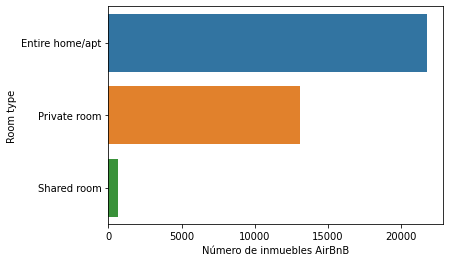

In [60]:
#plt.figure(figsize=(10,6))
sns.barplot(x = "Número de inmuebles AirBnB", y = "Room type", data = room_type_value)
#plt.xticks(rotation=90)
plt.show()

* **Neighbourhood**

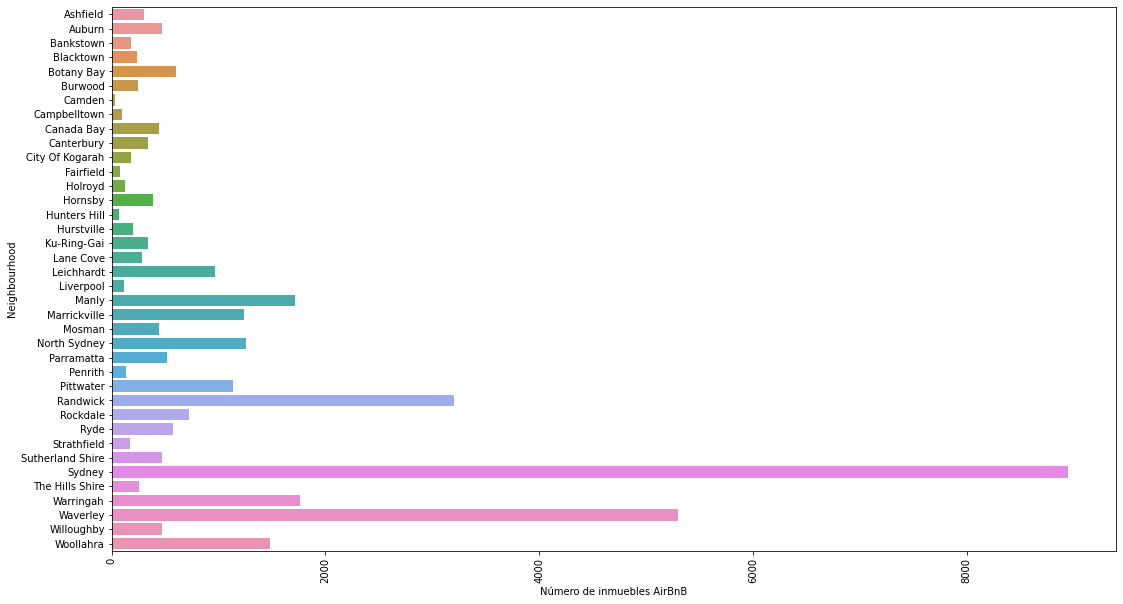

In [61]:
plt.figure(figsize=(18,10))
sns.barplot(x = "Número de inmuebles AirBnB", y = "Neighbourhood", data = neighbourhood_value)
plt.xticks(rotation=90)
plt.show()

#### Diagrama de Cajas y Bigotes con disperisón de datos * sin outliers*

**BOXPLOT ROOM_TYPE**

room_type vs price

room_type vs minimum_nights

room_type vs calculated_host_listings_count

room_type vs availability_365

room_type vs number_of_reviews

room_type vs reviews_per_month

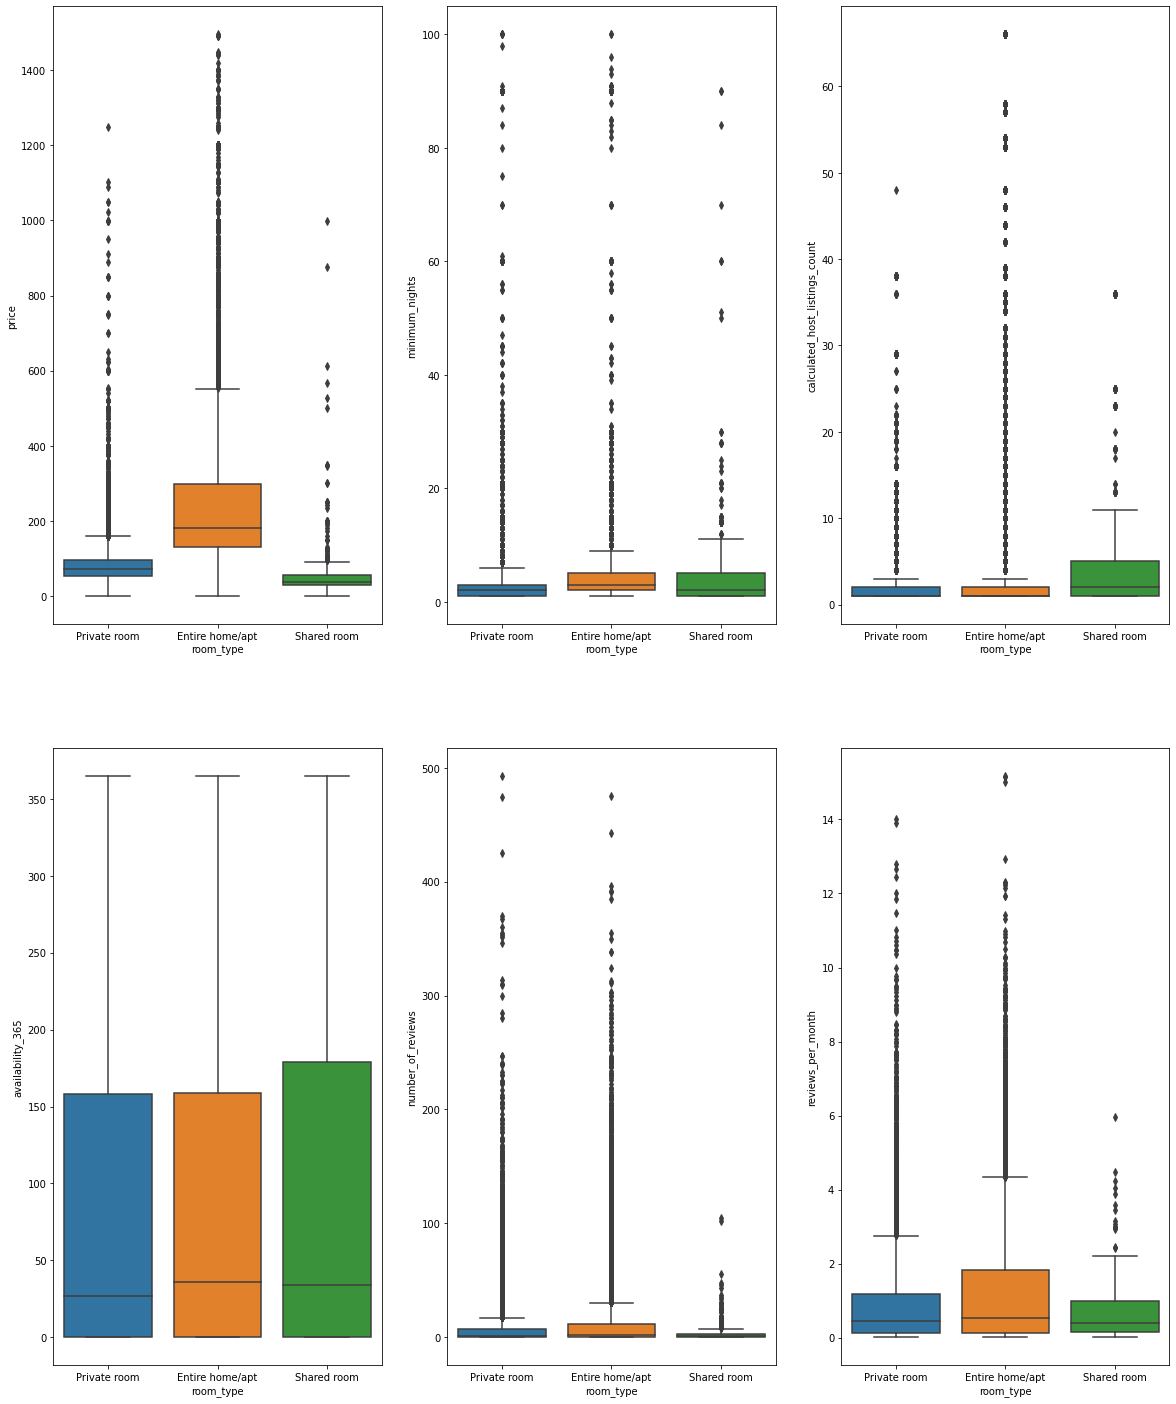

In [62]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 25))

plt.subplot(2,3,1)
sns.boxplot(x='room_type', y='price', data=df_fil_noches_hc)
plt.ylim()

plt.subplot(2,3,2)
sns.boxplot(x='room_type', y='minimum_nights', data=df_fil_noches_hc)
plt.ylim()

plt.subplot(2,3,3)
sns.boxplot(x='room_type', y='calculated_host_listings_count', data=df_fil_noches_hc)
plt.ylim()

plt.subplot(2,3,4)
sns.boxplot(x='room_type', y='availability_365', data=df_fil_noches_hc)
plt.ylim()

plt.subplot(2,3,5)
sns.boxplot(x='room_type', y='number_of_reviews', data=df_fil_noches_hc)
plt.ylim()

plt.subplot(2,3,6)
sns.boxplot(x='room_type', y='reviews_per_month', data=df_fil_noches_hc)
plt.ylim()

plt.show()

**BOXPLOT NEIGHBOURHOOD**

neighbourhood vs price

neighbourhood vs minimum_nights

neighbourhood vs calculated_host_listings_count

neighbourhood vs availability_365

neighbourhood vs number_of_reviews

neighbourhood vs reviews_per_month

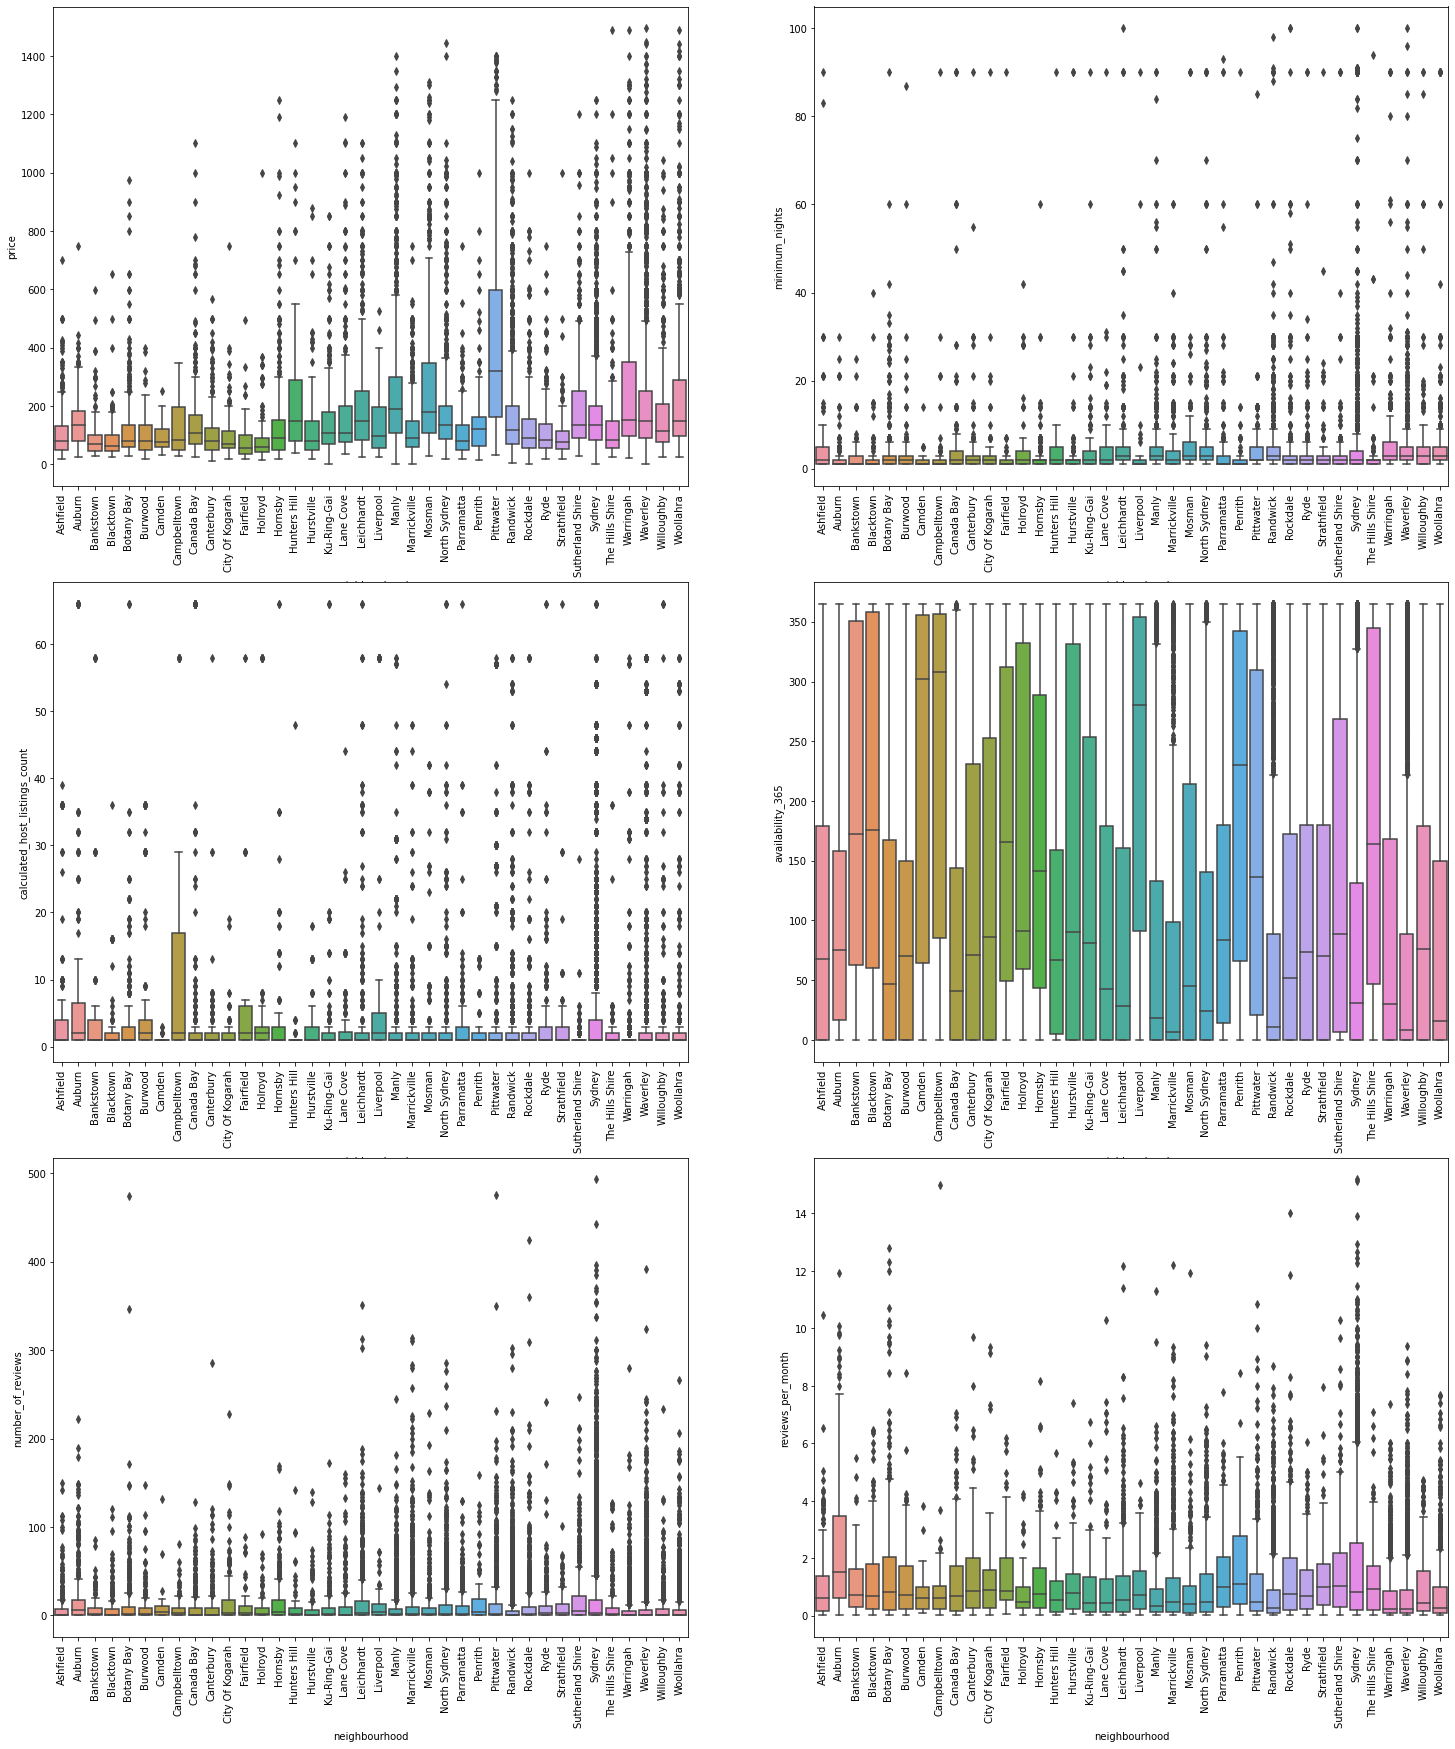

In [63]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))

plt.subplot(3,2,1)
sns.boxplot(x='neighbourhood', y='price', data=df_fil_noches_hc)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(3,2,2)
sns.boxplot(x='neighbourhood', y='minimum_nights', data=df_fil_noches_hc)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(3,2,3)
sns.boxplot(x='neighbourhood', y='calculated_host_listings_count', data=df_fil_noches_hc)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(3,2,4)
sns.boxplot(x='neighbourhood', y='availability_365', data=df_fil_noches_hc)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(3,2,5)
sns.boxplot(x='neighbourhood', y='number_of_reviews', data=df_fil_noches_hc)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(3,2,6)
sns.boxplot(x='neighbourhood', y='reviews_per_month', data=df_fil_noches_hc)
plt.xticks(rotation=90)
plt.ylim()

plt.show()

> ### 5.3. Variables numéricas

In [64]:
numericas

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

> **Longitude *vs* Número de inmuebles AirBnB**

In [65]:
lon = df_fil_noches_hc.longitude.value_counts().rename_axis('Longitude').reset_index(name='Número de inmuebles AirBnB')
lon.head (5)

Longitude  Número de inmuebles AirBnB
0  151.191896                           1
1  151.201916                           1
2  151.269127                           1
3  151.265511                           1
4  150.984749                           1

> **Latitude *vs* Número de inmuebles AirBnB**

In [66]:
lat = df_fil_noches_hc.latitude.value_counts().rename_axis('Latitude').reset_index(name='Número de inmuebles AirBnB')
lat.head (5)

Latitude  Número de inmuebles AirBnB
0 -33.865153                           1
1 -33.892047                           1
2 -33.893575                           1
3 -33.888045                           1
4 -33.818459                           1

>### 5.4. Visualización gráfica variables numéricas

#### Matriz de gráficos de variables numéricas

<function matplotlib.pyplot.show(close=None, block=None)>

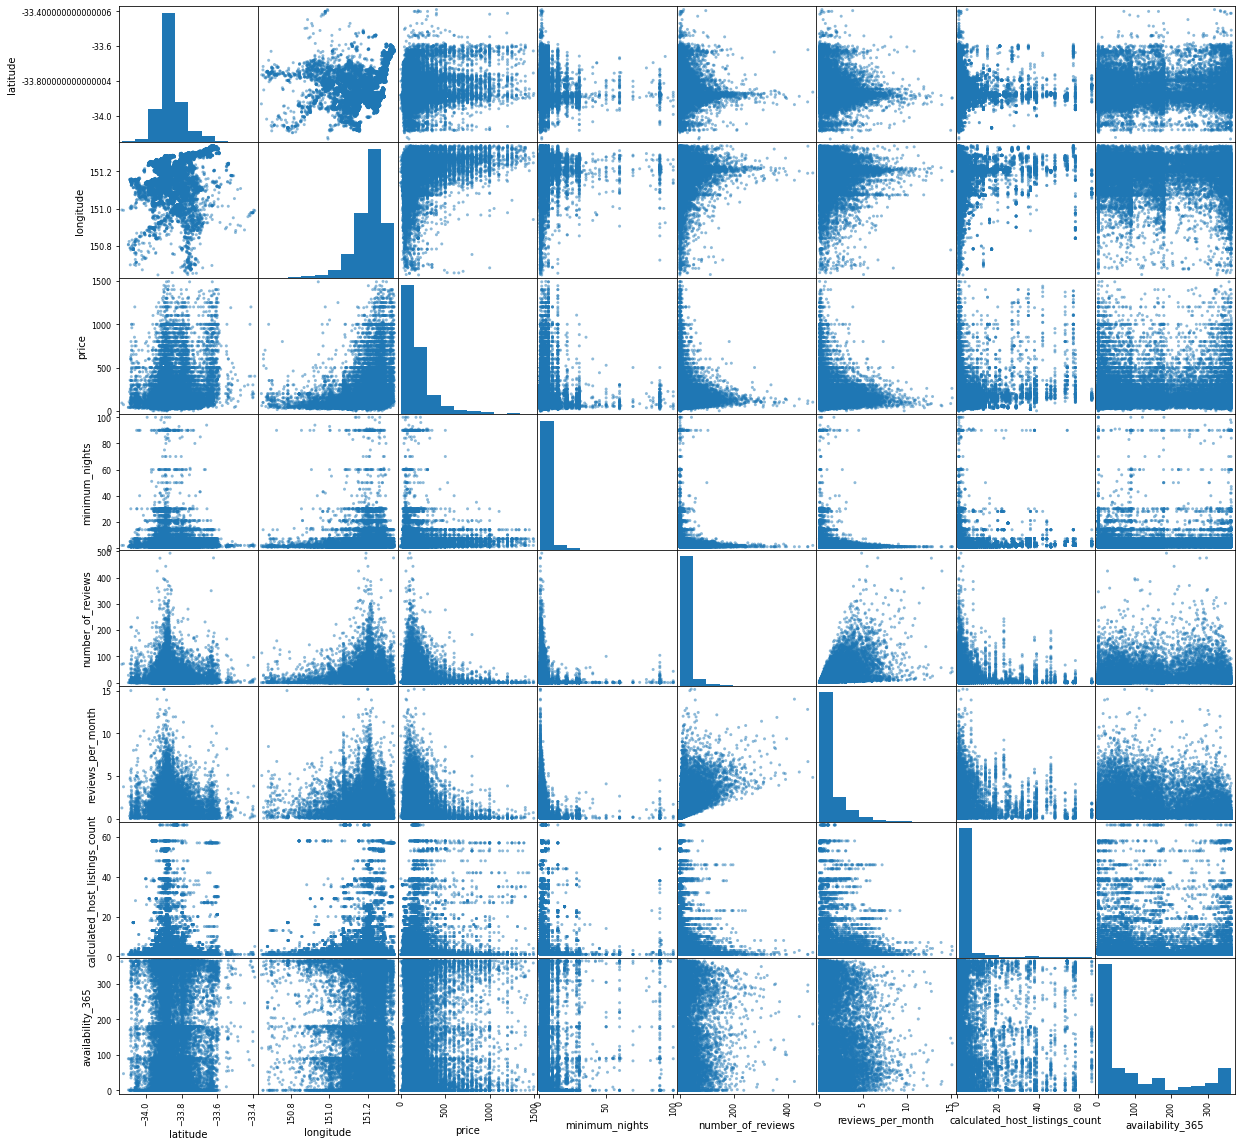

In [67]:
pd.plotting.scatter_matrix(df_fil_noches_hc[numericas], figsize=(20,20))
plt.show

#### scatterplot * sin outliers*

no importa si se utiliza hue con variables categóricas

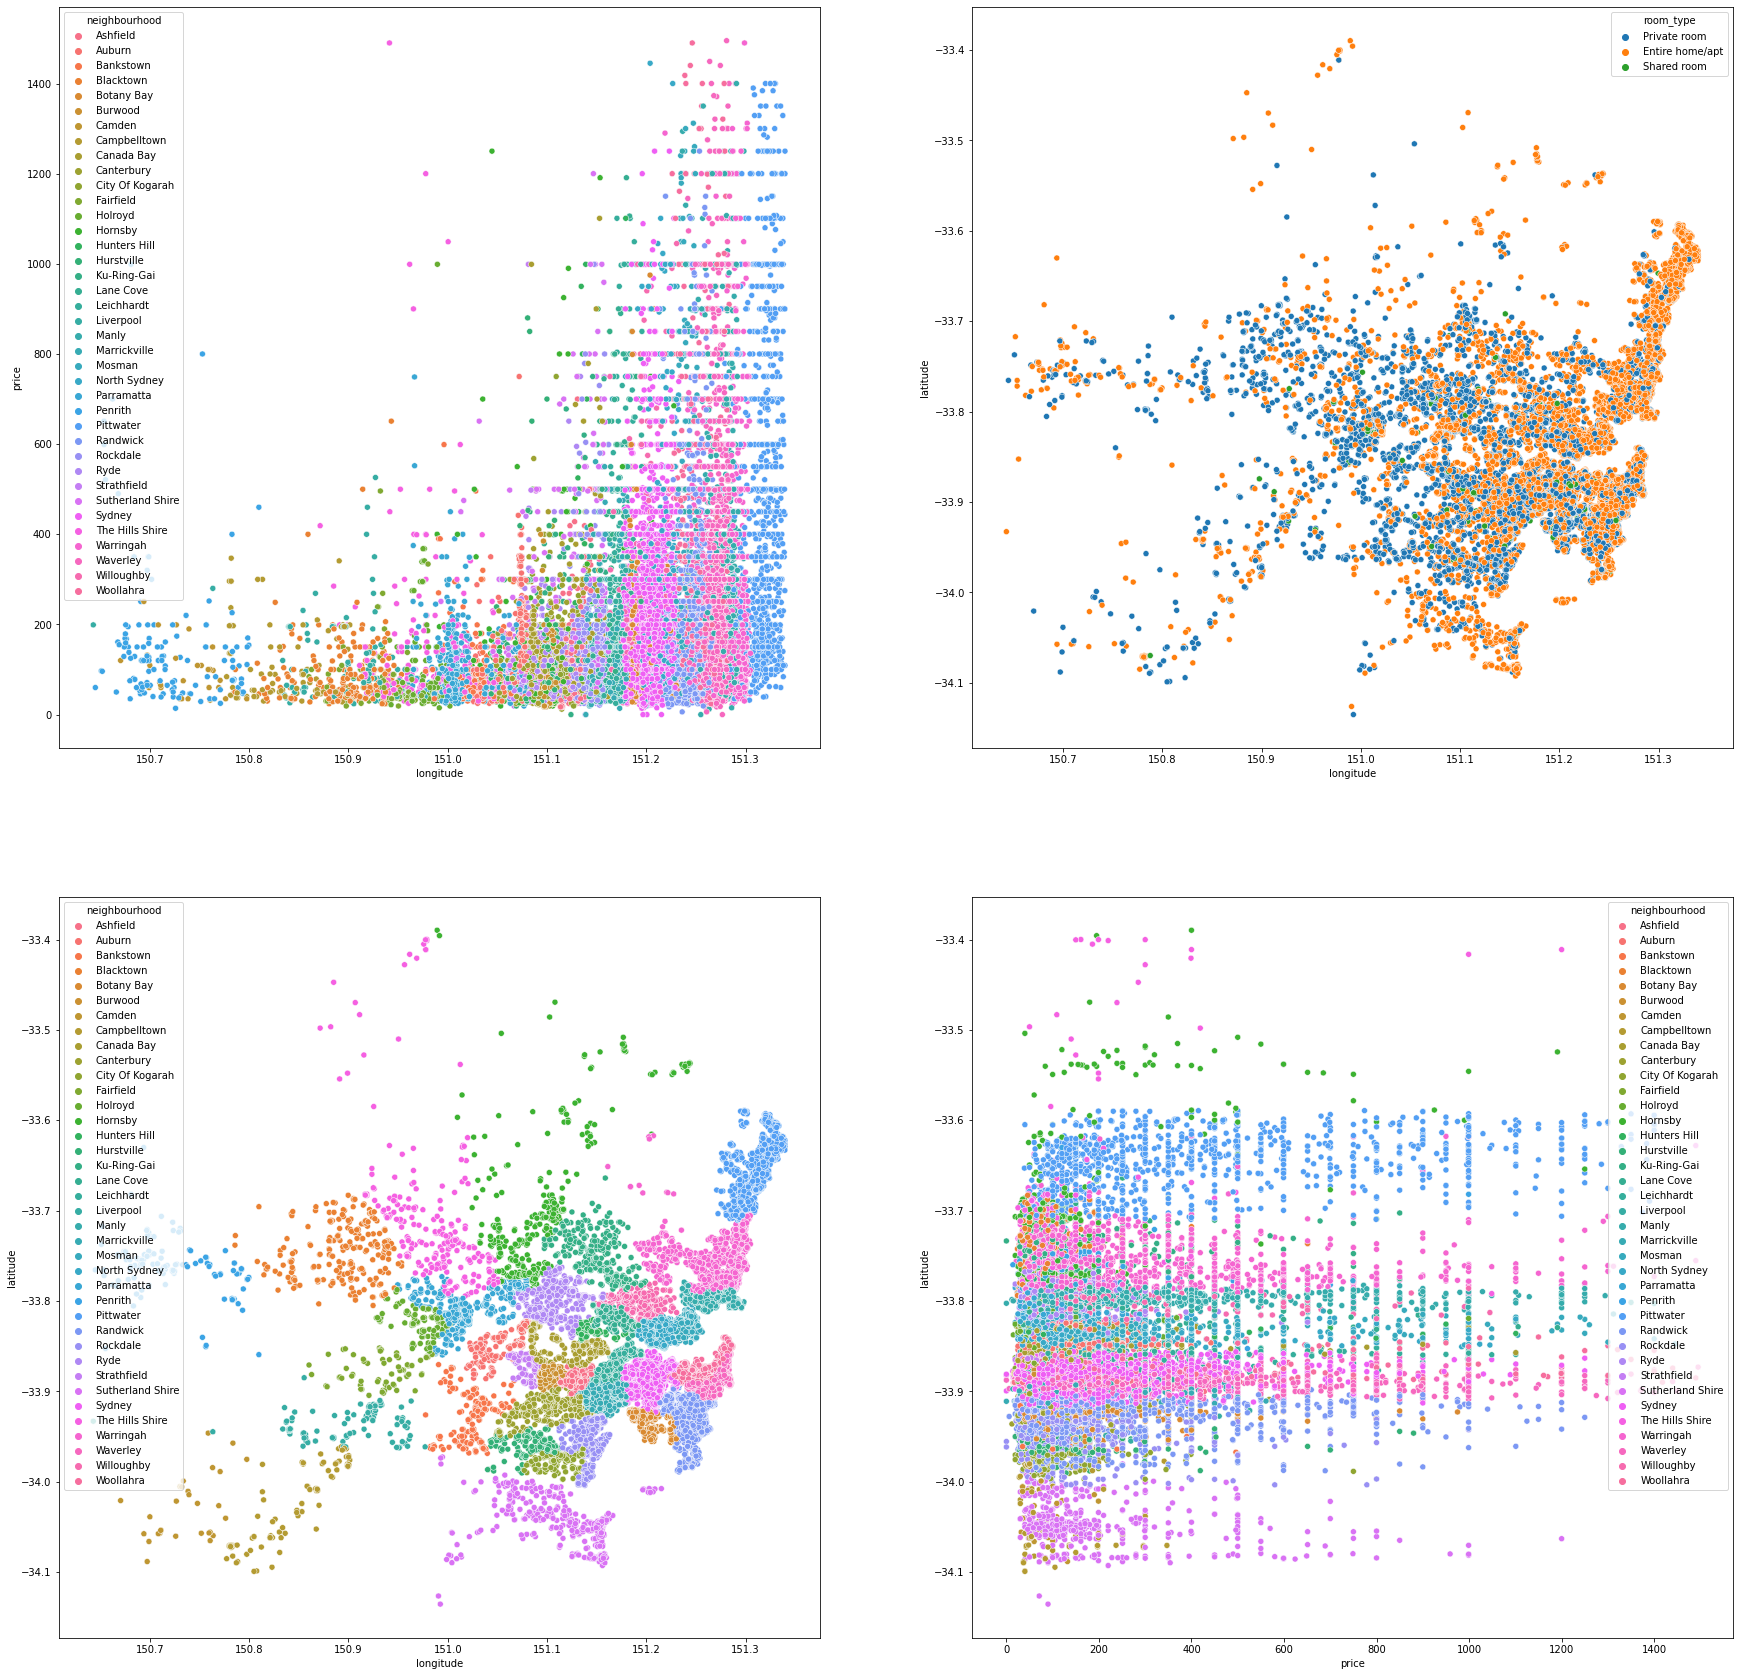

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))

plt.subplot(2,2,1)
sns.scatterplot(x="longitude", y="price", data=df_fil_noches_hc, hue="neighbourhood")
plt.ylim()

plt.subplot(2,2,2)
sns.scatterplot(x="longitude", y="latitude", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,3)
sns.scatterplot(x="longitude", y="latitude", data=df_fil_noches_hc, hue="neighbourhood")
plt.ylim()

plt.subplot(2,2,4)
sns.scatterplot(x="price", y="latitude", data=df_fil_noches_hc, hue="neighbourhood")
plt.ylim()

plt.show()

-Scatterplot de las varialbes con mayor coorelación

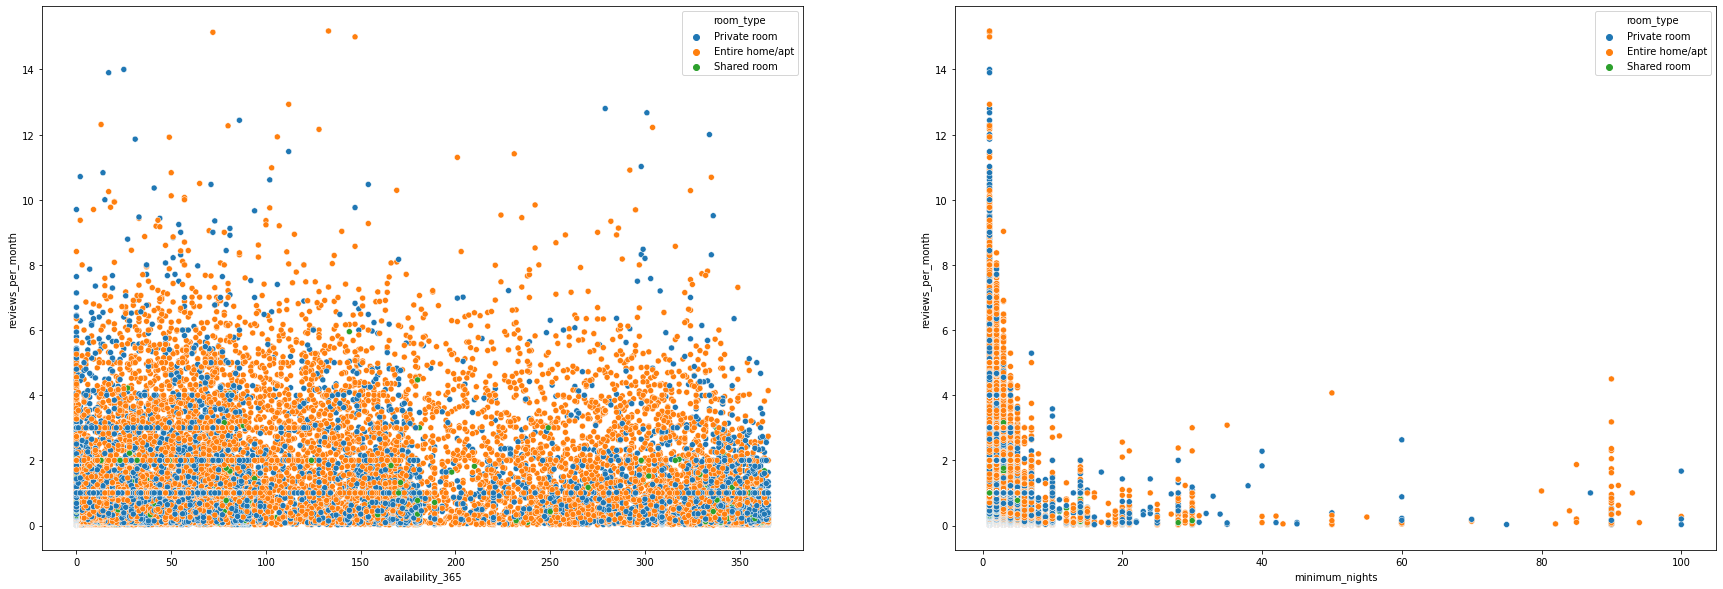

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

plt.subplot(1,2,1)
sns.scatterplot(x="availability_365", y="reviews_per_month", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(1,2,2)
sns.scatterplot(x="minimum_nights", y="reviews_per_month", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.show()

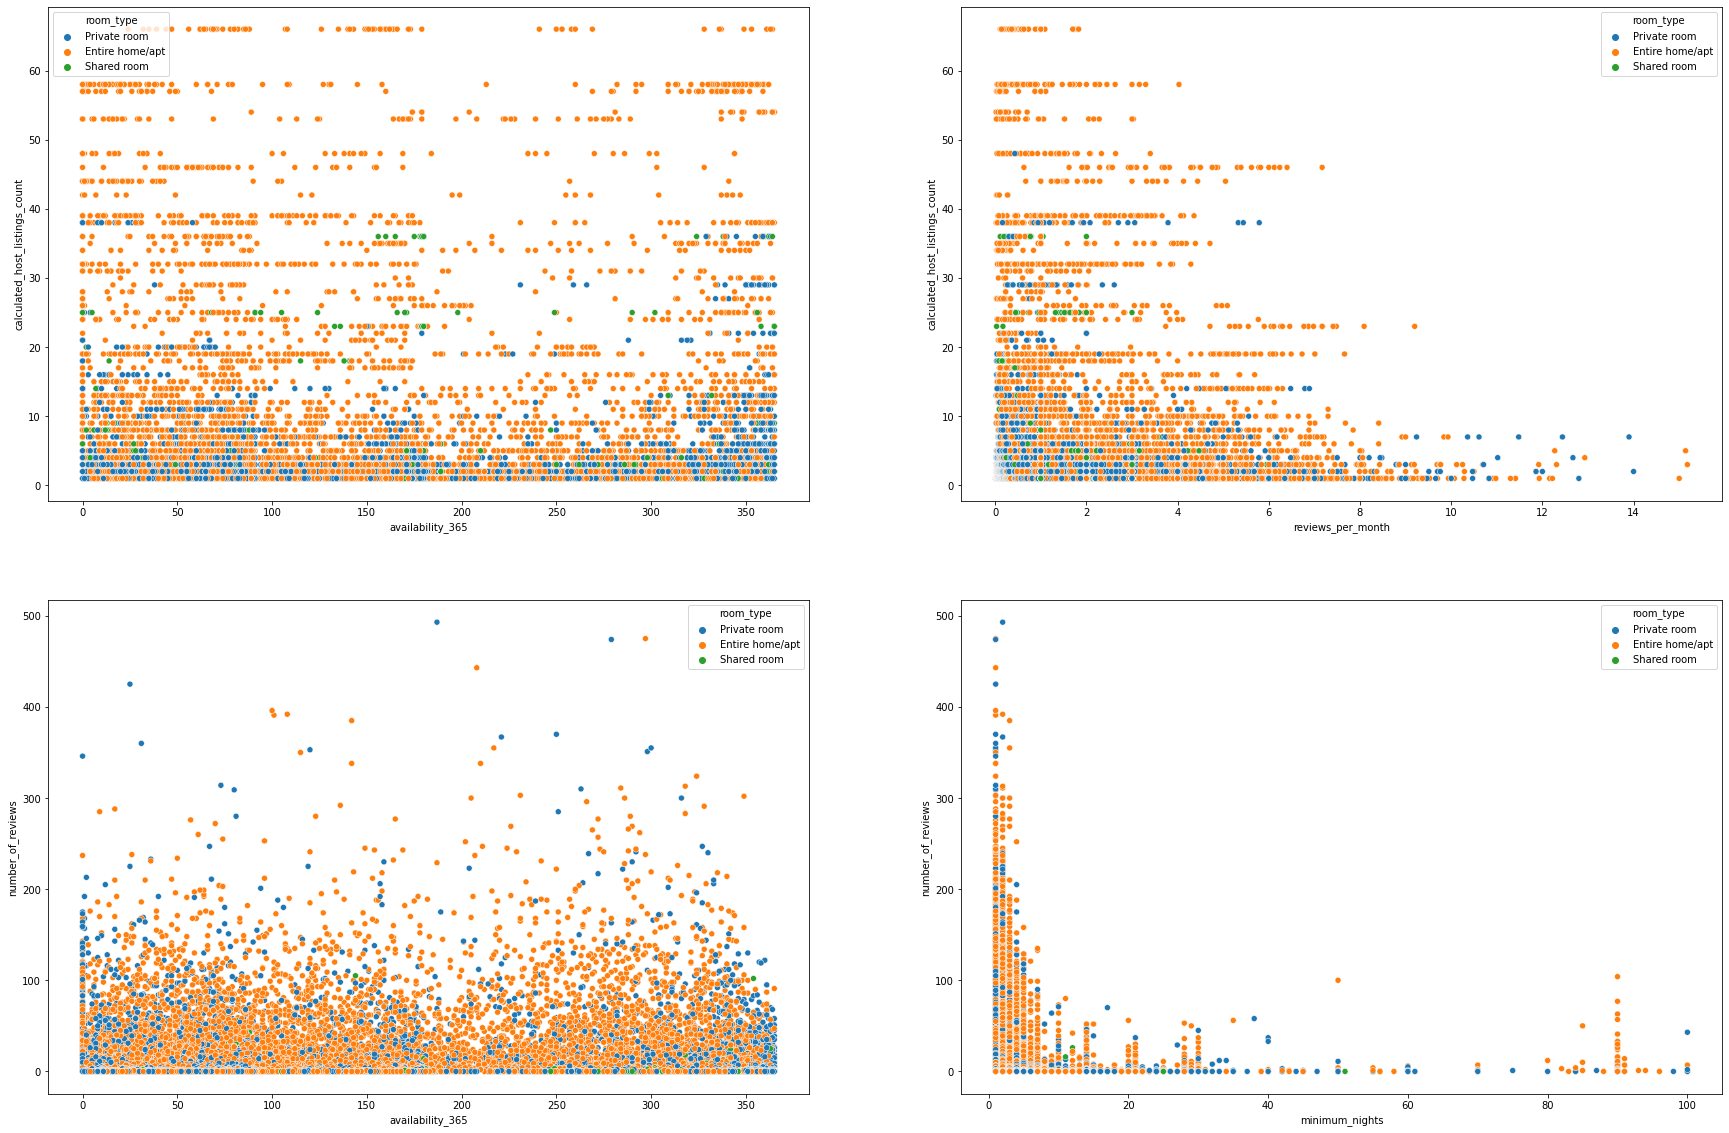

In [70]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

plt.subplot(2,2,1)
sns.scatterplot(x="availability_365", y="calculated_host_listings_count", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,2)
sns.scatterplot(x="reviews_per_month", y="calculated_host_listings_count", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,3)
sns.scatterplot(x="availability_365", y="number_of_reviews", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,4)
sns.scatterplot(x="minimum_nights", y="number_of_reviews", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.show()

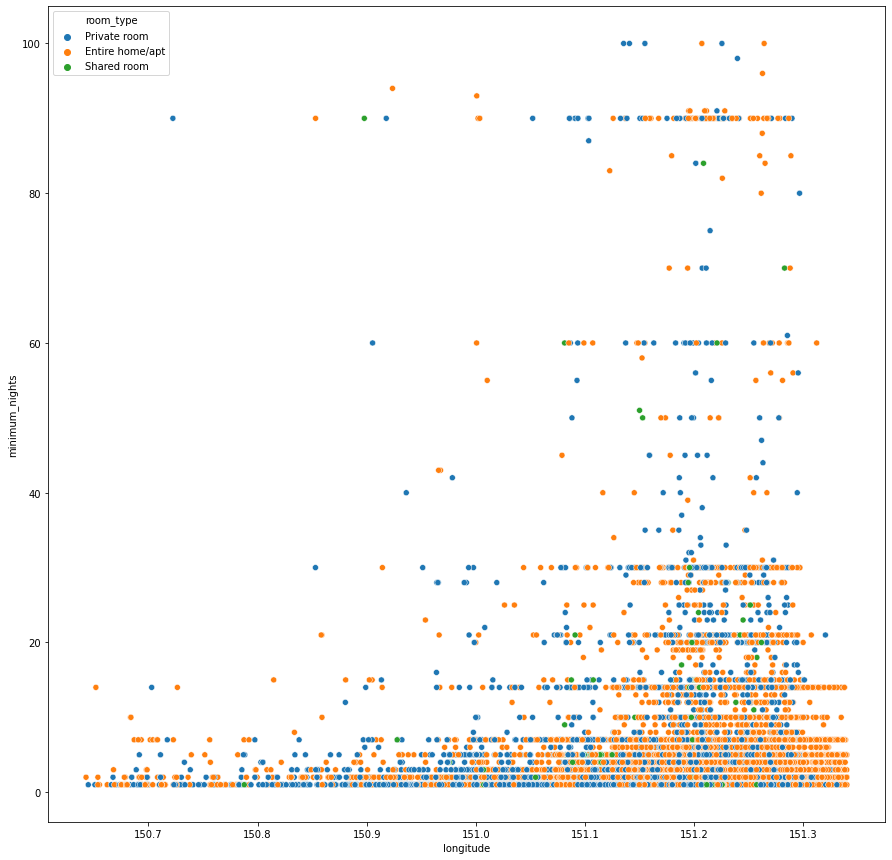

In [71]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="longitude", y="minimum_nights", data=df_fil_noches_hc, hue="room_type")
plt.show()

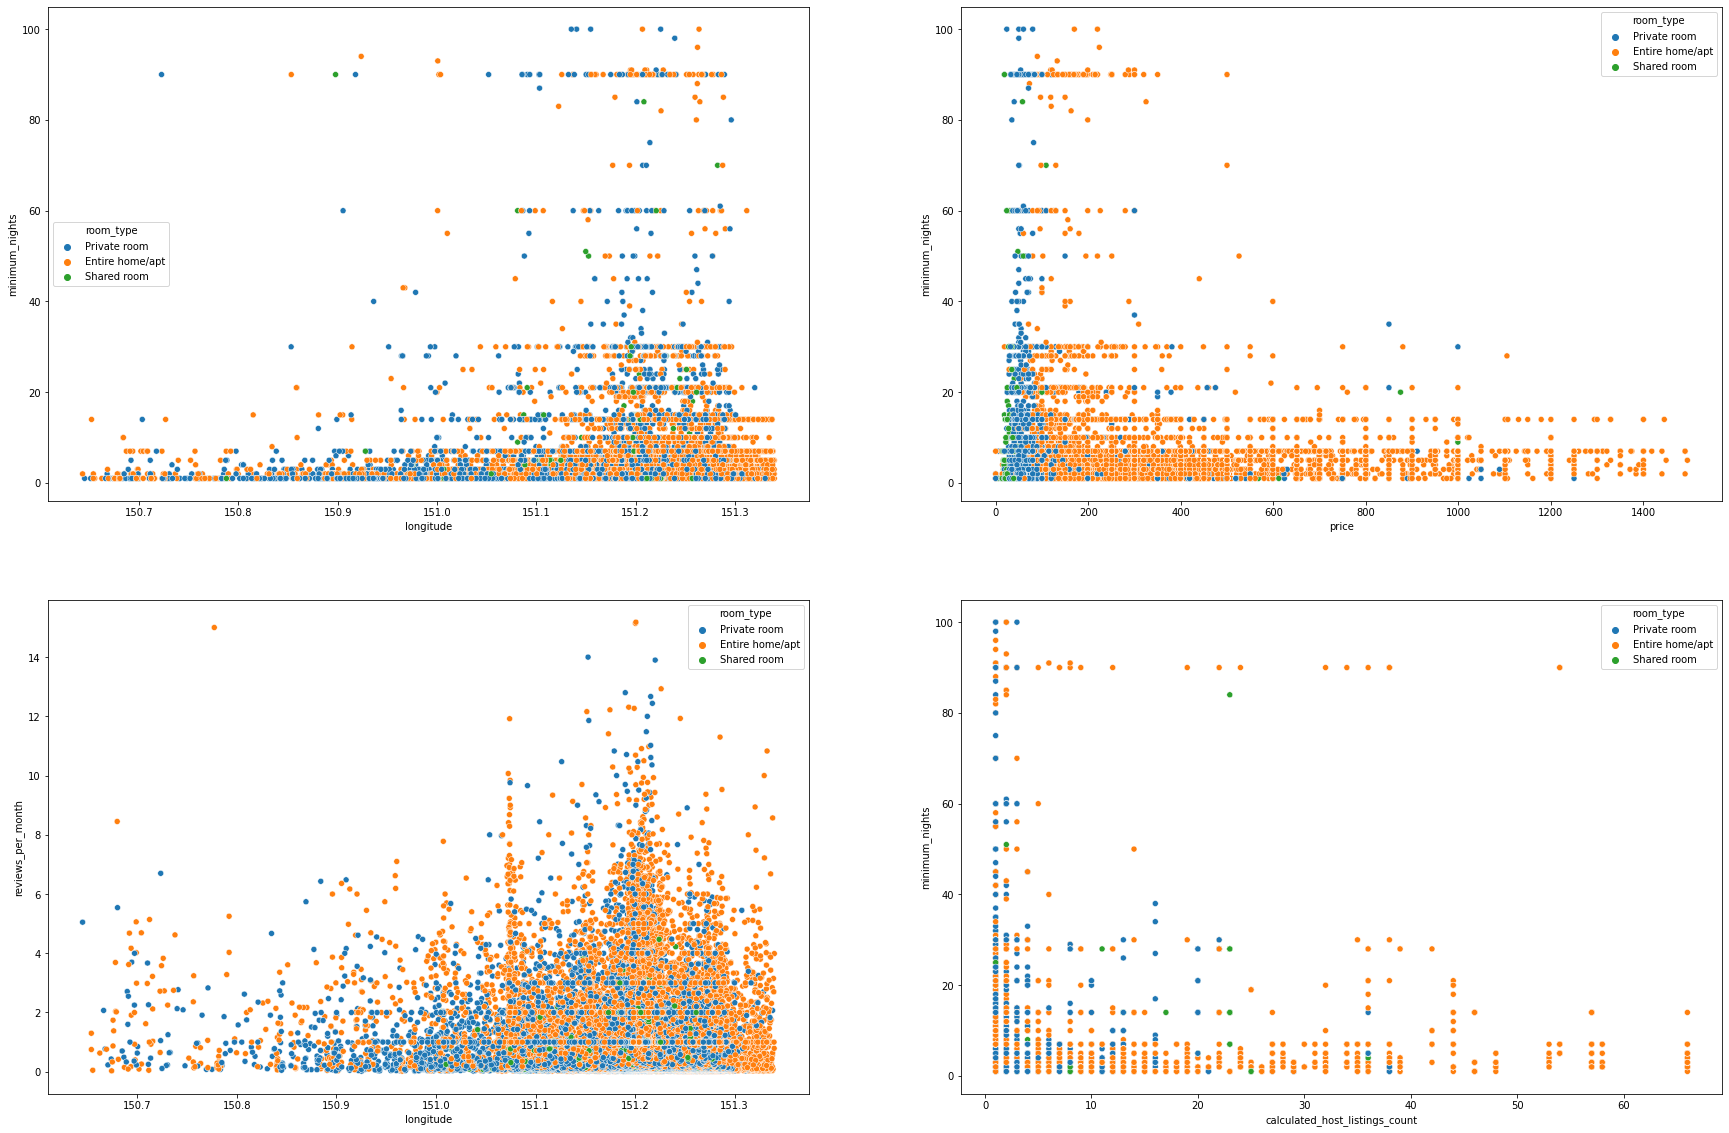

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

plt.subplot(2,2,1)
sns.scatterplot(x="longitude", y="minimum_nights", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,2)
sns.scatterplot(x="price", y="minimum_nights", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,3)
sns.scatterplot(x="longitude", y="reviews_per_month", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.subplot(2,2,4)
sns.scatterplot(x="calculated_host_listings_count", y="minimum_nights", data=df_fil_noches_hc, hue="room_type")
plt.ylim()

plt.show()

>### 5.5. Análisis de variables agrupadas (`.groupby`de Pandas)

In [73]:
df_fil_noches_hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 0 to 36661
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              35473 non-null  int64   
 1   name                            35461 non-null  object  
 2   host_id                         35473 non-null  int64   
 3   host_name                       35467 non-null  object  
 4   neighbourhood                   35473 non-null  category
 5   latitude                        35473 non-null  float64 
 6   longitude                       35473 non-null  float64 
 7   room_type                       35473 non-null  object  
 8   price                           35473 non-null  int64   
 9   minimum_nights                  35473 non-null  int64   
 10  number_of_reviews               35473 non-null  int64   
 11  last_review                     24065 non-null  object  
 12  reviews_per_month 

* ### Tablas de variables agrupadas (columnas)

ID      
Neighbourhood        
Value.counts       
Prom. Price.    
Room Type

### Tabla de variables (columnas) agrupadas

ID      Neighbourhood        Value.counts       Prom. Price.    Room Type

In [74]:
df_result = df_fil_noches_hc.groupby(['neighbourhood','room_type']).aggregate('mean')
df_result

id       host_id   latitude  \
neighbourhood room_type                                                
Ashfield      Entire home/apt  2.059445e+07  8.444929e+07 -33.887521   
              Private room     2.021677e+07  9.220471e+07 -33.887360   
              Shared room      2.582978e+07  1.560456e+08 -33.890597   
Auburn        Entire home/apt  2.312153e+07  1.184820e+08 -33.841398   
              Private room     2.259934e+07  1.063352e+08 -33.846338   
...                                     ...           ...        ...   
Willoughby    Private room     1.932890e+07  8.381103e+07 -33.802919   
              Shared room      2.213880e+07  8.818070e+07 -33.797135   
Woollahra     Entire home/apt  1.618973e+07  4.602260e+07 -33.878645   
              Private room     1.754902e+07  5.489740e+07 -33.880002   
              Shared room      2.176696e+07  1.356123e+08 -33.884554   

                                longitude       price  minimum_nights  \
neighbourhood room_type                                                 
Ashfield      Entire home/apt  151.131504  177.540741        3.970370   
              Private room     151.127603   62.986667        3.740000   
              Shared room      151.118152   24.500000        4.250000   
Auburn        Entire home/apt  151.071353  181.288961        2.165584   
              Private room     151.055100   70.906040        2.060403   
...                                   ...         ...             ...   
Willoughby    Private room     151.186355   81.041026        3.789744   
              Shared room      151.184237  228.222222        4.222222   
Woollahra     Entire home/apt  151.247365  303.764350        5.086606   
              Private room     151.247677   97.452229        3.944798   
              Shared room      151.257285   53.230769        4.846154   

                               number_of_reviews  reviews_per_month  \
neighbourhood room_type                                               
Ashfield      Entire home/apt          11.859259           1.256735   
              Private room              8.453333           1.000737   
              Shared room               2.800000           0.738750   
Auburn        Entire home/apt          23.214286           2.740392   
              Private room              9.228188           1.394732   
...                                          ...                ...   
Willoughby    Private room              8.784615           0.915736   
              Shared room               2.333333           0.652500   
Woollahra     Entire home/apt          10.910373           0.872793   
              Private room              7.532909           0.609734   
              Shared room               1.153846           0.383333   

                               calculated_host_listings_count  \
neighbourhood room_type                                         
Ashfield      Entire home/apt                        3.614815   
              Private room                           3.780000   
              Shared room                           25.900000   
Auburn        Entire home/apt                        9.561688   
              Private room                           3.174497   
...                                                       ...   
Willoughby    Private room                           1.969231   
              Shared room                            1.666667   
Woollahra     Entire home/apt                        4.069486   
              Private room                           1.581741   
              Shared room                            1.538462   

                               availability_365  neighbourhood_code  
neighbourhood room_type                                              
Ashfield      Entire home/apt         90.703704                 0.0  
              Private room           113.933333                 0.0  
              Shared room            245.650000                 0.0  
Auburn        Entire home/apt     

* DataFrame con valores importantes tal no se que era pero creo que era asi

* Sólo dejamos las variables que nos interesa para graficar

In [75]:
df_tabla = df_result.drop([ 'id' , 'host_id' , 'latitude' , 'longitude'], axis=1)
df_tabla

price  minimum_nights  number_of_reviews  \
neighbourhood room_type                                                        
Ashfield      Entire home/apt  177.540741        3.970370          11.859259   
              Private room      62.986667        3.740000           8.453333   
              Shared room       24.500000        4.250000           2.800000   
Auburn        Entire home/apt  181.288961        2.165584          23.214286   
              Private room      70.906040        2.060403           9.228188   
...                                   ...             ...                ...   
Willoughby    Private room      81.041026        3.789744           8.784615   
              Shared room      228.222222        4.222222           2.333333   
Woollahra     Entire home/apt  303.764350        5.086606          10.910373   
              Private room      97.452229        3.944798           7.532909   
              Shared room       53.230769        4.846154           1.153846   

                               reviews_per_month  \
neighbourhood room_type                            
Ashfield      Entire home/apt           1.256735   
              Private room              1.000737   
              Shared room               0.738750   
Auburn        Entire home/apt           2.740392   
              Private room              1.394732   
...                                          ...   
Willoughby    Private room              0.915736   
              Shared room               0.652500   
Woollahra     Entire home/apt           0.872793   
              Private room              0.609734   
              Shared room               0.383333   

                               calculated_host_listings_count  \
neighbourhood room_type                                         
Ashfield      Entire home/apt                        3.614815   
              Private room                           3.780000   
              Shared room                           25.900000   
Auburn        Entire home/apt                        9.561688   
              Private room                           3.174497   
...                                                       ...   
Willoughby    Private room                           1.969231   
              Shared room                            1.666667   
Woollahra     Entire home/apt                        4.069486   
              Private room                           1.581741   
              Shared room                            1.538462   

                               availability_365  neighbourhood_code  
neighbourhood room_type                                              
Ashfield      Entire home/apt         90.703704                 0.0  
              Private room           113.933333                 0.0  
              Shared room            245.650000                 0.0  
Auburn        Entire home/apt        112.438312                 1.0  
              Private room            99.765101                 1.0  
...                                         ...                 ...  
Willoughby    Private room           125.656410                36.0  
              Shared room            156.111111                36.0  
Woollahra     Entire home/apt         90.342397                37.0  
              Private room            77.978769                37.0  
              Shared room             42.153846                37.0  

[114 rows x 7 columns]

In [76]:
df_tabla.index

MultiIndex([(  'Ashfield', 'Entire home/apt'),
            (  'Ashfield',    'Private room'),
            (  'Ashfield',     'Shared room'),
            (    'Auburn', 'Entire home/apt'),
            (    'Auburn',    'Private room'),
            (    'Auburn',     'Shared room'),
            ( 'Bankstown', 'Entire home/apt'),
            ( 'Bankstown',    'Private room'),
            ( 'Bankstown',     'Shared room'),
            ( 'Blacktown', 'Entire home/apt'),
            ...
            ( 'Warringah',     'Shared room'),
            (  'Waverley', 'Entire home/apt'),
            (  'Waverley',    'Private room'),
            (  'Waverley',     'Shared room'),
            ('Willoughby', 'Entire home/apt'),
            ('Willoughby',    'Private room'),
            ('Willoughby',     'Shared room'),
            ( 'Woollahra', 'Entire home/apt'),
            ( 'Woollahra',    'Private room'),
            ( 'Woollahra',     'Shared room')],
           names=['neighbourhood', 'room_ty

* **How to convert index of a pandas dataframe into a column**


In [77]:
#How to convert index of a pandas dataframe into a column
#df_tabla = df_tabla.reset_index(level=0)

#df_tabla['index1'] = df_tabla.index

#df_tabla = df_tabla.unstack(level=0)
#df_tabla

In [78]:
df_tabla.head()

price  minimum_nights  number_of_reviews  \
neighbourhood room_type                                                        
Ashfield      Entire home/apt  177.540741        3.970370          11.859259   
              Private room      62.986667        3.740000           8.453333   
              Shared room       24.500000        4.250000           2.800000   
Auburn        Entire home/apt  181.288961        2.165584          23.214286   
              Private room      70.906040        2.060403           9.228188   

                               reviews_per_month  \
neighbourhood room_type                            
Ashfield      Entire home/apt           1.256735   
              Private room              1.000737   
              Shared room               0.738750   
Auburn        Entire home/apt           2.740392   
              Private room              1.394732   

                               calculated_host_listings_count  \
neighbourhood room_type                                         
Ashfield      Entire home/apt                        3.614815   
              Private room                           3.780000   
              Shared room                           25.900000   
Auburn        Entire home/apt                        9.561688   
              Private room                           3.174497   

                               availability_365  neighbourhood_code  
neighbourhood room_type                                              
Ashfield      Entire home/apt         90.703704                 0.0  
              Private room           113.933333                 0.0  
              Shared room            245.650000                 0.0  
Auburn        Entire home/apt        112.438312                 1.0  
              Private room            99.765101                 1.0

In [79]:
df_tabla.index

MultiIndex([(  'Ashfield', 'Entire home/apt'),
            (  'Ashfield',    'Private room'),
            (  'Ashfield',     'Shared room'),
            (    'Auburn', 'Entire home/apt'),
            (    'Auburn',    'Private room'),
            (    'Auburn',     'Shared room'),
            ( 'Bankstown', 'Entire home/apt'),
            ( 'Bankstown',    'Private room'),
            ( 'Bankstown',     'Shared room'),
            ( 'Blacktown', 'Entire home/apt'),
            ...
            ( 'Warringah',     'Shared room'),
            (  'Waverley', 'Entire home/apt'),
            (  'Waverley',    'Private room'),
            (  'Waverley',     'Shared room'),
            ('Willoughby', 'Entire home/apt'),
            ('Willoughby',    'Private room'),
            ('Willoughby',     'Shared room'),
            ( 'Woollahra', 'Entire home/apt'),
            ( 'Woollahra',    'Private room'),
            ( 'Woollahra',     'Shared room')],
           names=['neighbourhood', 'room_ty

In [80]:
df_tabla = df_tabla.reset_index(level=0)
df_tabla

neighbourhood       price  minimum_nights  number_of_reviews  \
room_type                                                                      
Entire home/apt      Ashfield  177.540741        3.970370          11.859259   
Private room         Ashfield   62.986667        3.740000           8.453333   
Shared room          Ashfield   24.500000        4.250000           2.800000   
Entire home/apt        Auburn  181.288961        2.165584          23.214286   
Private room           Auburn   70.906040        2.060403           9.228188   
...                       ...         ...             ...                ...   
Private room       Willoughby   81.041026        3.789744           8.784615   
Shared room        Willoughby  228.222222        4.222222           2.333333   
Entire home/apt     Woollahra  303.764350        5.086606          10.910373   
Private room        Woollahra   97.452229        3.944798           7.532909   
Shared room         Woollahra   53.230769        4.846154           1.153846   

                 reviews_per_month  calculated_host_listings_count  \
room_type                                                            
Entire home/apt           1.256735                        3.614815   
Private room              1.000737                        3.780000   
Shared room               0.738750                       25.900000   
Entire home/apt           2.740392                        9.561688   
Private room              1.394732                        3.174497   
...                            ...                             ...   
Private room              0.915736                        1.969231   
Shared room               0.652500                        1.666667   
Entire home/apt           0.872793                        4.069486   
Private room              0.609734                        1.581741   
Shared room               0.383333                        1.538462   

                 availability_365  neighbourhood_code  
room_type                                              
Entire home/apt         90.703704                 0.0  
Private room           113.933333                 0.0  
Shared room            245.650000                 0.0  
Entire home/apt        112.438312                 1.0  
Private room            99.765101                 1.0  
...                           ...                 ...  
Private room           125.656410                36.0  
Shared room            156.111111                36.0  
Entire home/apt         90.342397                37.0  
Private room            77.978769                37.0  
Shared room             42.153846                37.0  

[114 rows x 8 columns]

In [81]:
df_tabla = df_tabla.reset_index(level=0)
df_tabla

room_type neighbourhood       price  minimum_nights  \
0    Entire home/apt      Ashfield  177.540741        3.970370   
1       Private room      Ashfield   62.986667        3.740000   
2        Shared room      Ashfield   24.500000        4.250000   
3    Entire home/apt        Auburn  181.288961        2.165584   
4       Private room        Auburn   70.906040        2.060403   
..               ...           ...         ...             ...   
109     Private room    Willoughby   81.041026        3.789744   
110      Shared room    Willoughby  228.222222        4.222222   
111  Entire home/apt     Woollahra  303.764350        5.086606   
112     Private room     Woollahra   97.452229        3.944798   
113      Shared room     Woollahra   53.230769        4.846154   

     number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0            11.859259           1.256735                        3.614815   
1             8.453333           1.000737                        3.780000   
2             2.800000           0.738750                       25.900000   
3            23.214286           2.740392                        9.561688   
4             9.228188           1.394732                        3.174497   
..                 ...                ...                             ...   
109           8.784615           0.915736                        1.969231   
110           2.333333           0.652500                        1.666667   
111          10.910373           0.872793                        4.069486   
112           7.532909           0.609734                        1.581741   
113           1.153846           0.383333                        1.538462   

     availability_365  neighbourhood_code  
0           90.703704                 0.0  
1          113.933333                 0.0  
2          245.650000                 0.0  
3          112.438312                 1.0  
4           99.765101                 1.0  
..                ...                 ...  
109        125.656410                36.0  
110        156.111111                36.0  
111         90.342397                37.0  
112         77.978769                37.0  
113         42.153846                37.0  

[114 rows x 9 columns]

* ### Visualización gráfica de variables agrupadas

ID      Neighbourhood        Value.counts       Prom. Price.    Room Type

In [82]:
df_tabla.head(3)

room_type neighbourhood       price  minimum_nights  \
0  Entire home/apt      Ashfield  177.540741         3.97037   
1     Private room      Ashfield   62.986667         3.74000   
2      Shared room      Ashfield   24.500000         4.25000   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0          11.859259           1.256735                        3.614815   
1           8.453333           1.000737                        3.780000   
2           2.800000           0.738750                       25.900000   

   availability_365  neighbourhood_code  
0         90.703704                 0.0  
1        113.933333                 0.0  
2        245.650000                 0.0

>### catplot --->gráfico variables categoricas (como sexo y survive del Titanic) 

In [83]:
#sns.catplot(x ='neighbourhood', hue ='Survived', kind ='count', col ='room_type', data = df)


In [84]:
df_fil_noches_hc.price.describe()

count    35473.000000
mean       186.909791
std        183.182324
min          0.000000
25%         78.000000
50%        130.000000
75%        217.000000
max       1495.000000
Name: price, dtype: float64

* **¿Por qué si el máximo de `price`es 1495 en *df_fil_noches_hc*, en el sns.catplot me grafica precios solo hasta 600?**

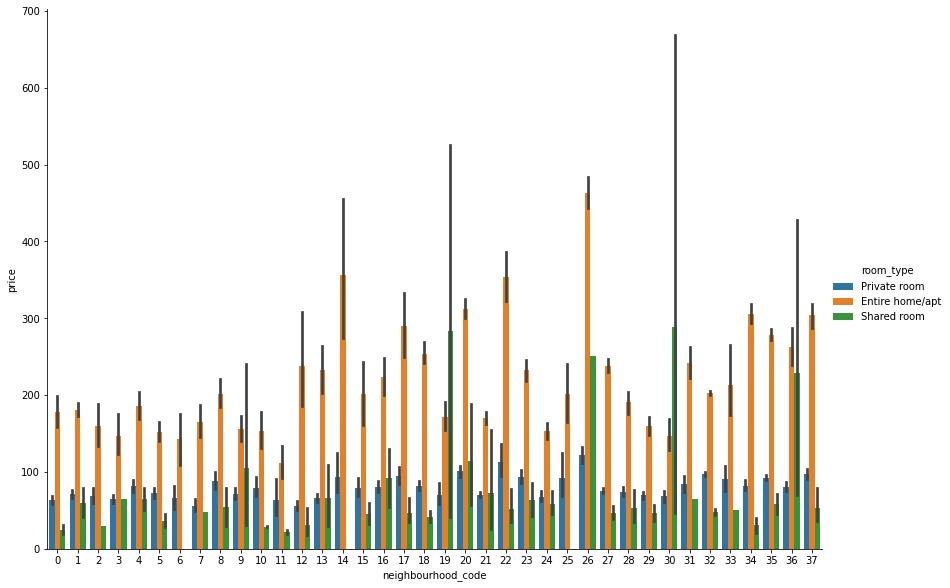

In [85]:
sns.catplot(data=df_fil_noches_hc, x='neighbourhood_code', y='price',kind ='bar', 
            hue='room_type', height=8.27, aspect=11.7/8.27)

<Figure size 144x144 with 0 Axes>

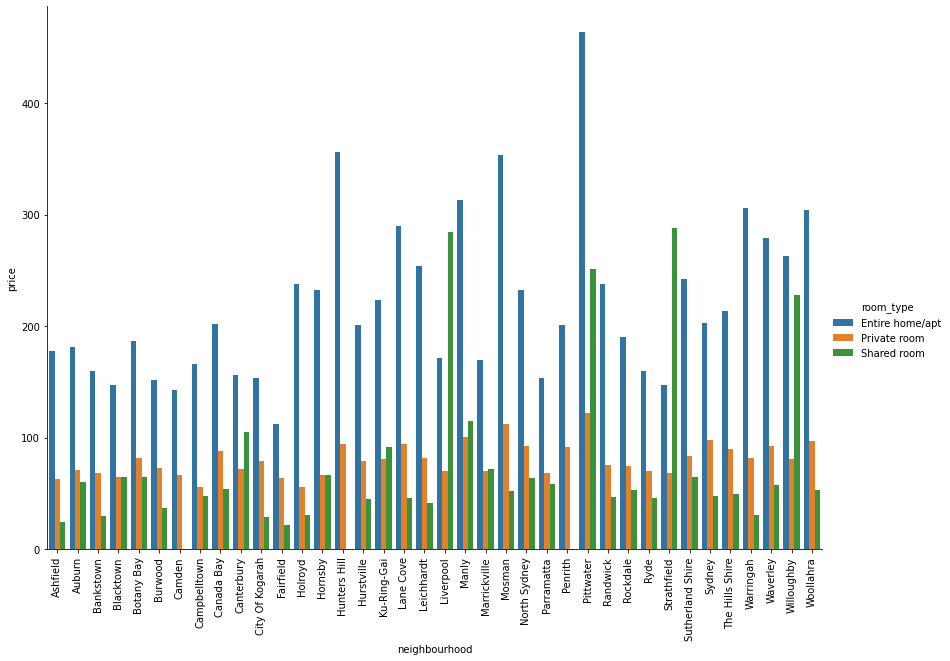

In [86]:
plt.figure(figsize=(2,2))
sns.catplot(x ='neighbourhood', y='price', hue ='room_type', kind ='bar', data = df_tabla, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

In [87]:
Entire_home = df_fil_noches_hc.loc[:, 'room_type'] == 'Entire home/apt'
df_Entire_home = df_fil_noches_hc.loc[Entire_home]
df_Entire_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21781 entries, 1 to 36660
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              21781 non-null  int64   
 1   name                            21777 non-null  object  
 2   host_id                         21781 non-null  int64   
 3   host_name                       21777 non-null  object  
 4   neighbourhood                   21781 non-null  category
 5   latitude                        21781 non-null  float64 
 6   longitude                       21781 non-null  float64 
 7   room_type                       21781 non-null  object  
 8   price                           21781 non-null  int64   
 9   minimum_nights                  21781 non-null  int64   
 10  number_of_reviews               21781 non-null  int64   
 11  last_review                     15309 non-null  object  
 12  reviews_per_month 

In [88]:
Private_room = df_fil_noches_hc.loc[:, 'room_type'] == 'Private room'
df_Private_room = df_fil_noches_hc.loc[Private_room]
df_Private_room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13064 entries, 0 to 36661
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              13064 non-null  int64   
 1   name                            13058 non-null  object  
 2   host_id                         13064 non-null  int64   
 3   host_name                       13062 non-null  object  
 4   neighbourhood                   13064 non-null  category
 5   latitude                        13064 non-null  float64 
 6   longitude                       13064 non-null  float64 
 7   room_type                       13064 non-null  object  
 8   price                           13064 non-null  int64   
 9   minimum_nights                  13064 non-null  int64   
 10  number_of_reviews               13064 non-null  int64   
 11  last_review                     8444 non-null   object  
 12  reviews_per_month 

In [89]:
Shared_room = df_fil_noches_hc.loc[:, 'room_type'] == 'Shared room'
df_Shared_room = df_fil_noches_hc.loc[Shared_room]
df_Shared_room.head (5)

id                                 name   host_id host_name  \
240    651796   Maroubra Junction, Eastern Suburbs   3275877      Elle   
1470  2667767  A humble apartment in a nice suburb  13656336       Jin   
1579  2879387  affordable  rooms at prime location  14702243     James   
1718  3168890             cozy room in nice suburb  14702243     James   
1782  3284239  Close to airport, beach and Novotel  14432012  Catriona   

     neighbourhood   latitude   longitude    room_type  price  minimum_nights  \
240       Randwick -33.946527  151.242427  Shared room     75               2   
1470        Sydney -33.879078  151.186253  Shared room     91               1   
1579        Sydney -33.879185  151.186857  Shared room    126               1   
1718        Sydney -33.879345  151.185092  Shared room    123               1   
1782      Rockdale -33.960027  151.153648  Shared room    120               2   

      number_of_reviews last_review  reviews_per_month  \
240                   0         NaN                NaN   
1470                  7  2018-02-22               0.12   
1579                  1  2018-03-16               0.11   
1718                  0         NaN                NaN   
1782                 37  2018-11-24               0.73   

      calculated_host_listings_count  availability_365  neighbourhood_code  \
240                                1                 0                  27   
1470                               1               363                  32   
1579                               2               364                  32   
1718                               2               363                  32   
1782                               2                25                  28   

           Host_name_and_Id  
240        Elle, Id:3275877  
1470       Jin, Id:13656336  
1579     James, Id:14702243  
1718     James, Id:14702243  
1782  Catriona, Id:14432012

<function matplotlib.pyplot.show(close=None, block=None)>

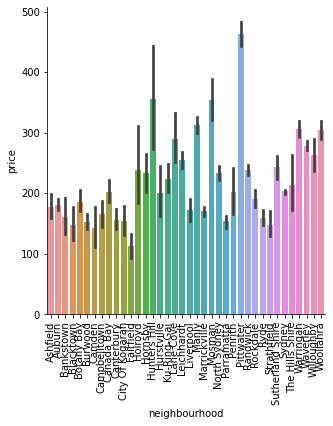

In [90]:
sns.catplot(x ='neighbourhood', y='price', kind ='bar', data = df_Entire_home)
plt.xticks(rotation=90)
plt.ylim()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

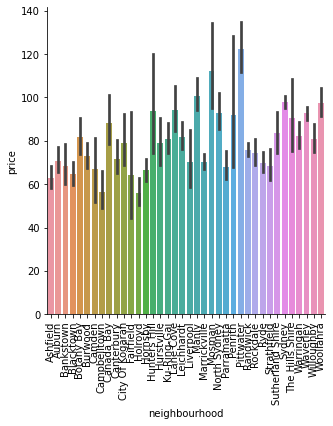

In [91]:
sns.catplot(x ='neighbourhood', y='price', kind ='bar', data = df_Private_room)
plt.xticks(rotation=90)
plt.ylim()

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

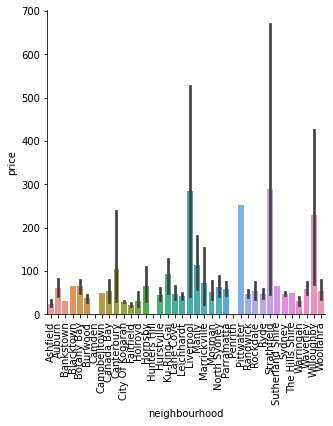

In [92]:
sns.catplot(x ='neighbourhood', y='price', kind ='bar', data = df_Shared_room)
plt.xticks(rotation=90)
plt.ylim()

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

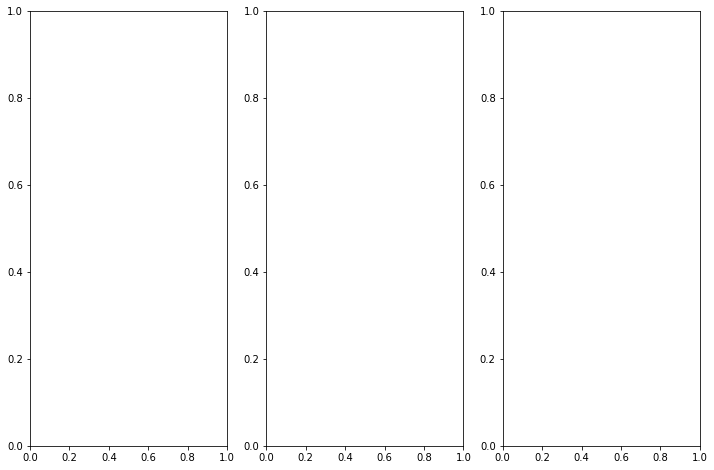

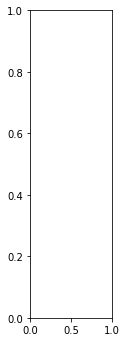

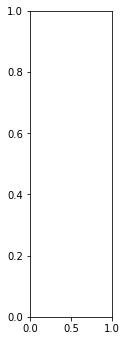

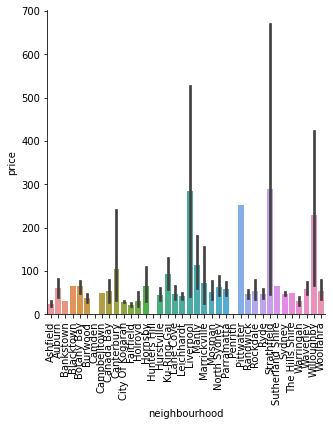

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

plt.subplot(1,3,1)
sns.catplot(x ='neighbourhood', y='price', kind ='bar', data = df_Entire_home)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(1,3,2)
sns.catplot(x ='neighbourhood', y='price', kind ='bar', data = df_Private_room)
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(1,3,3)
sns.catplot(x ='neighbourhood', y='price', kind ='bar', data = df_Shared_room)
plt.xticks(rotation=90)
plt.ylim()

plt.show

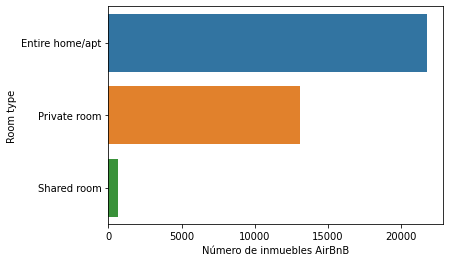

In [94]:
#plt.figure(figsize=(10,6))
sns.barplot(x = "Número de inmuebles AirBnB", y = "Room type", data = room_type_value)
#plt.xticks(rotation=90)
plt.show()

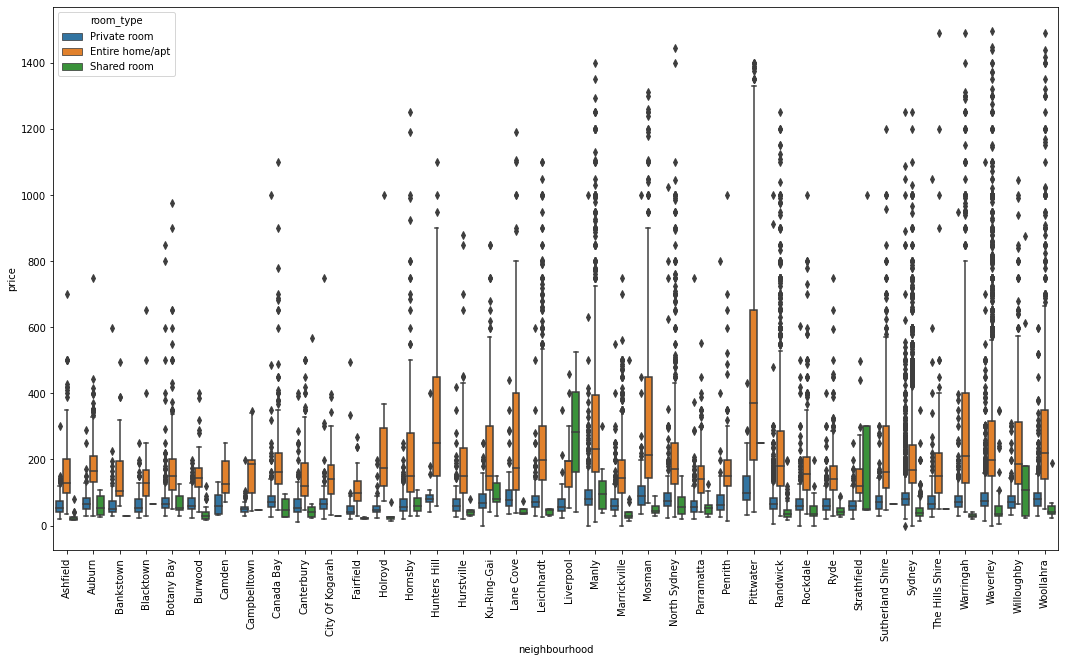

In [95]:
plt.figure(figsize=(18,10))
a= sns.boxplot(x="neighbourhood", y="price",hue="room_type",data=df_fil_noches_hc)

#sns.despine(offset=10, trim=True)

a.set_xticklabels(a.get_xticklabels(),rotation=90)

plt.show()


* **Agrupamos `host_id` y `host_name` para ver si nos puede servir de algo el dejar solo una fila para cada host**

In [96]:
df_cosa = df_fil_noches_hc.groupby(['host_id','host_name']).aggregate('min')
df_cosa.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27028 entries, (8346, 'Melody') to (229479027, 'Sofei & Kelvin')
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27028 non-null  int64  
 1   latitude                        27028 non-null  float64
 2   longitude                       27028 non-null  float64
 3   room_type                       27028 non-null  object 
 4   price                           27028 non-null  int64  
 5   minimum_nights                  27028 non-null  int64  
 6   number_of_reviews               27028 non-null  int64  
 7   reviews_per_month               18537 non-null  float64
 8   calculated_host_listings_count  27028 non-null  int64  
 9   availability_365                27028 non-null  int64  
 10  neighbourhood_code              27028 non-null  int8   
 11  Host_name_and_Id                27028 non-null  object

C:\Users\Pablo\AppData\Local\Temp\ipykernel_19444\1227917580.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df_cosa = df_fil_noches_hc.groupby(['host_id','host_name']).aggregate('min')


# ---------------------------------------------------------------------------

## 7. Análisis estadístico de datos

> ### 7.1. Pruebas de Normalidad 

> #### Distribución de datos gráficas:

Se realiza la descripción visual o gráfica de la distribución de datos de las variables de la base de datos.

Utilizamos 3 aproximaciones gráficas básicas para *evaluar* el tipo de distribución de datos de variables observadas:
 * **Histogramas o barras de distribución** de datos.
 * **Gráficos de densidad** para distribución de datos
 * **Q-Q Plots**

* #### Barras de distribución (`sns.distplot`) + Gráficos de densidad (`kde`)

#### Argumentos importantes de este gráfico de distribución:
**Rug plot**---->muestra marcas a lo largo de un eje. Se utiliza para visualizar la distribución de los datos.

**Bins**---->número de rangos en eje X

**kde**---->Calcula la estimación de la densidad del kernel

In [97]:
numericas

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  

<function matplotlib.pyplot.show(close=None, block=None)>

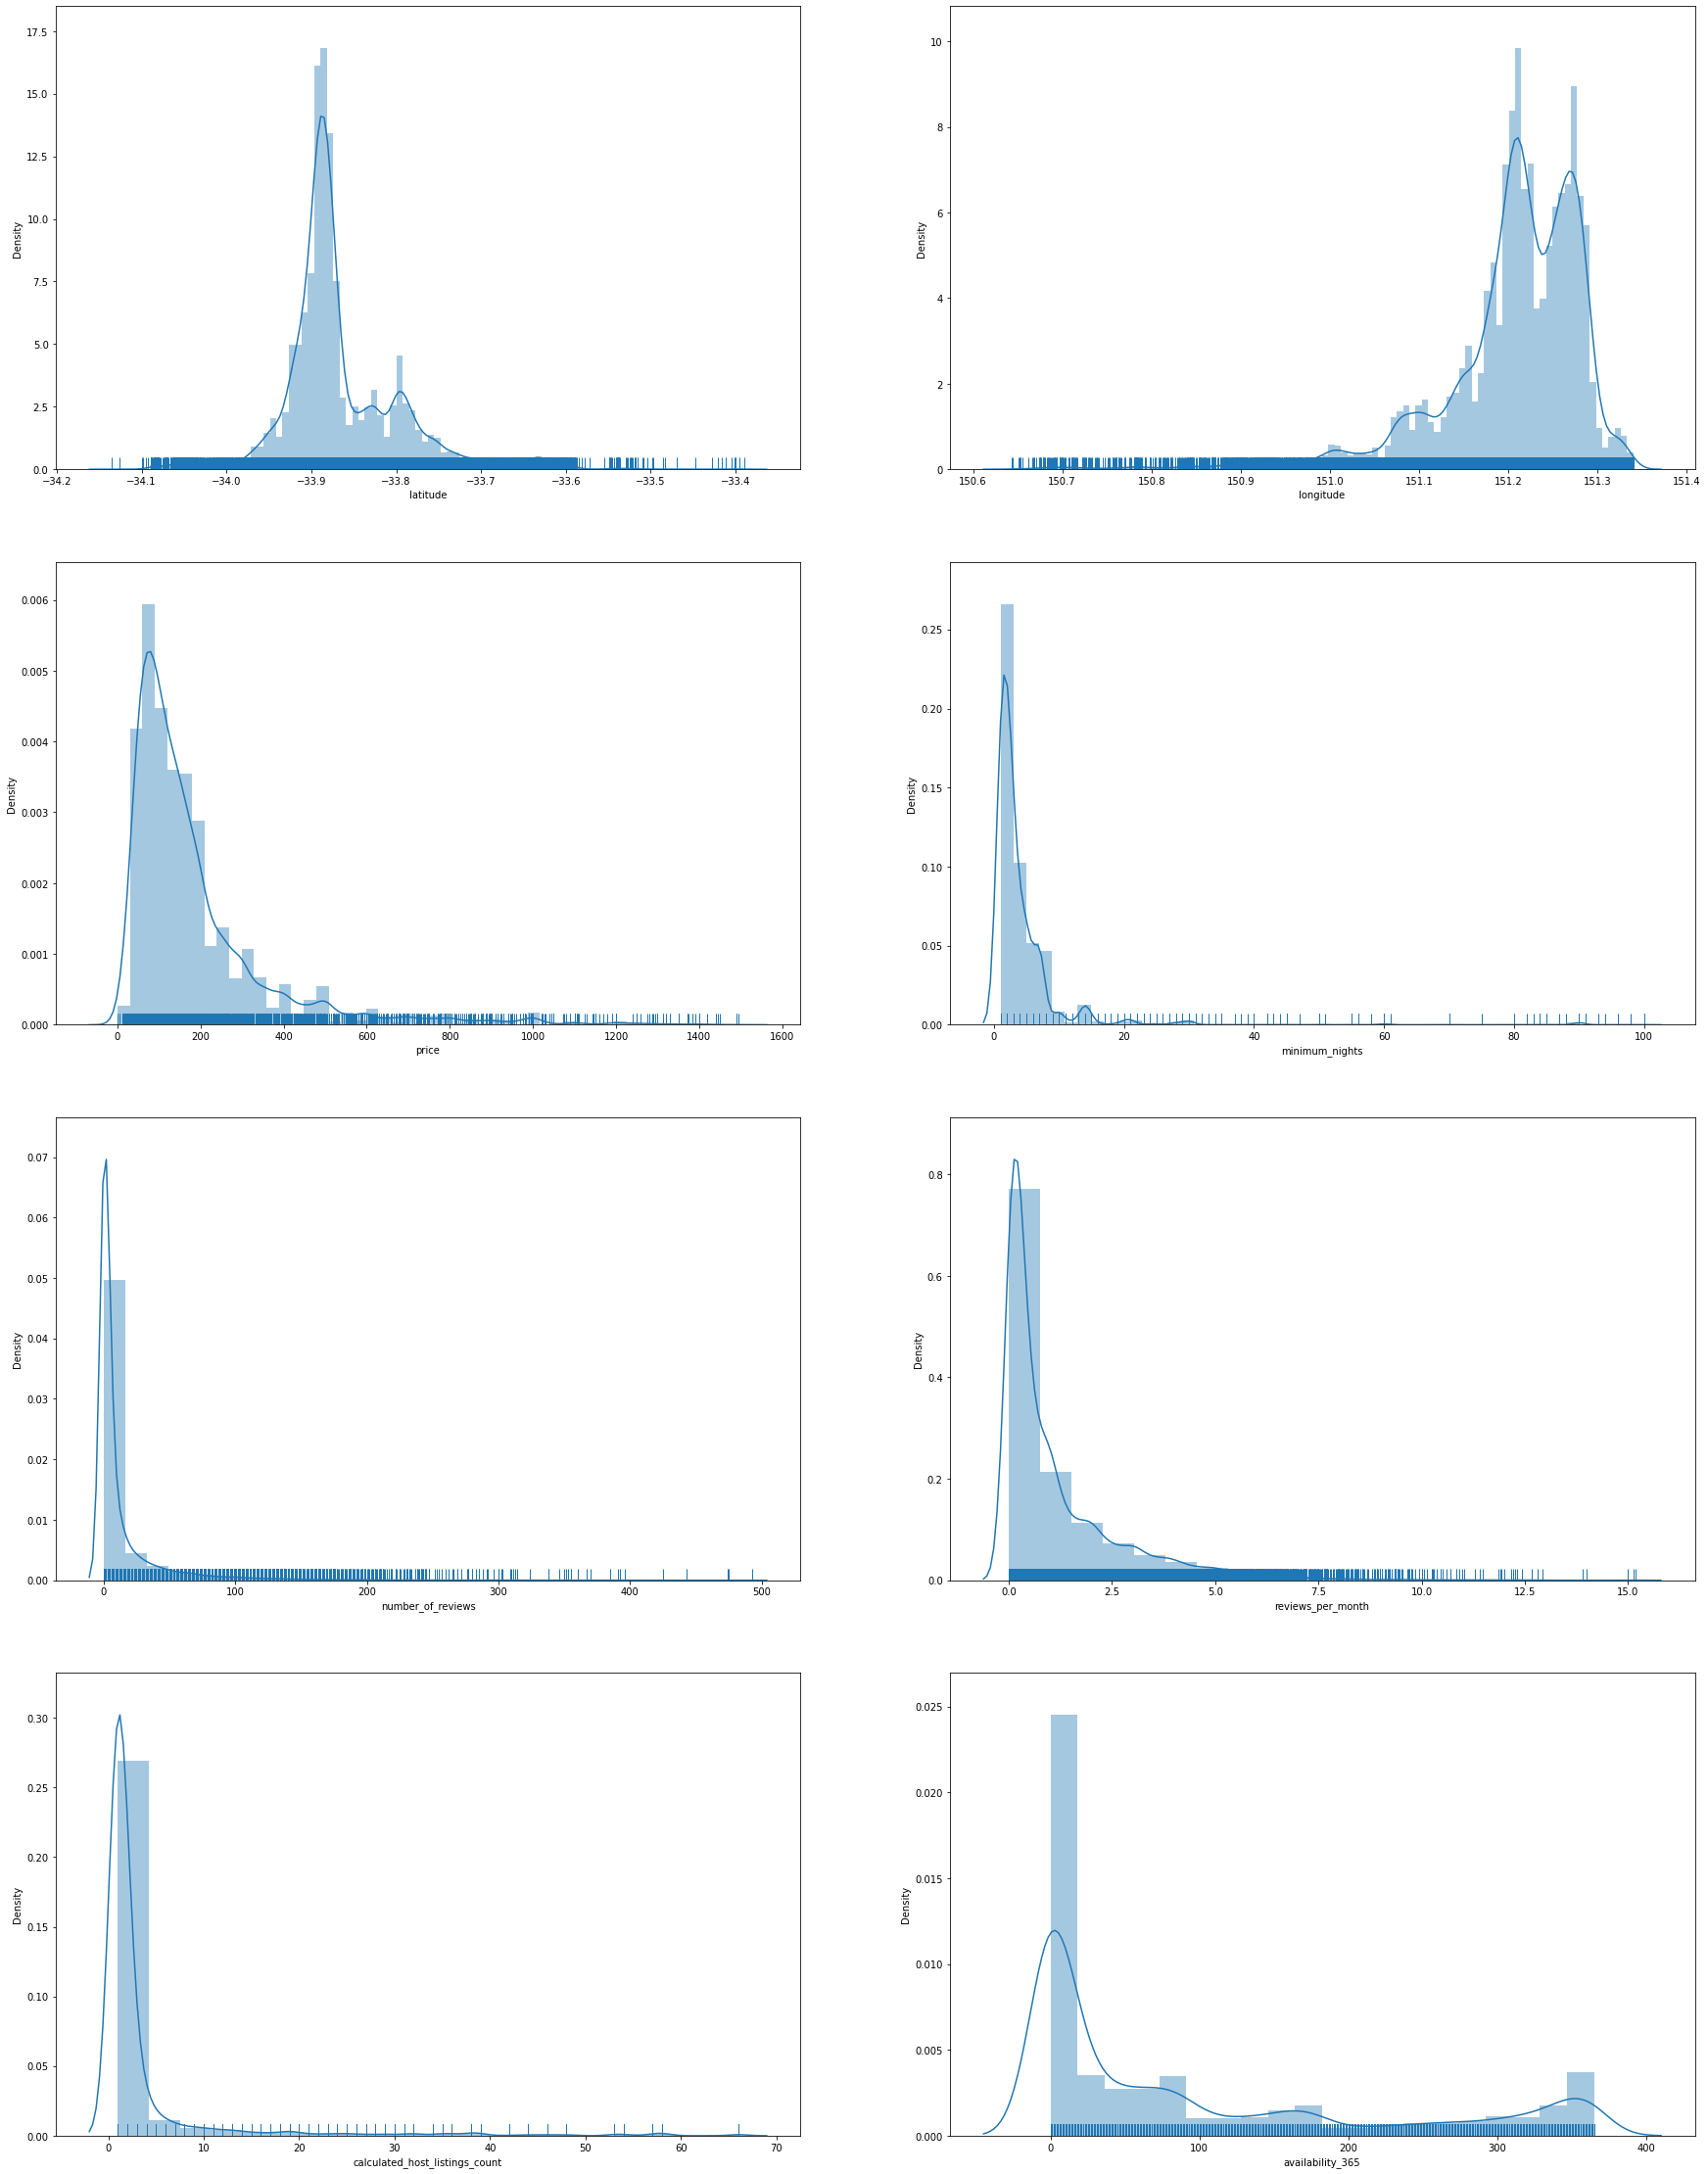

In [98]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(30, 40))

plt.subplot(4,2,1)
sns.distplot(df_fil_noches_hc['latitude'], kde = True, bins=100, rug = True)
plt.ylim()

plt.subplot(4,2,2)
sns.distplot(df_fil_noches_hc['longitude'], kde = True, bins=100, rug = True)
plt.ylim()

plt.subplot(4,2,3)
sns.distplot(df_fil_noches_hc['price'], kde = True, bins=50, rug = True)
plt.ylim()

plt.subplot(4,2,4)
sns.distplot(df_fil_noches_hc['minimum_nights'], kde = True, bins=50, rug = True)
plt.ylim()

plt.subplot(4,2,5)
sns.distplot(df_fil_noches_hc['number_of_reviews'], kde = True, bins=30, rug = True)
plt.ylim()

plt.subplot(4,2,6)
sns.distplot(df_fil_noches_hc['reviews_per_month'], kde = True, bins=20, rug = True)
plt.ylim()

plt.subplot(4,2,7)
sns.distplot(df_fil_noches_hc['calculated_host_listings_count'], kde = True, bins=20, rug = True)
plt.ylim()

plt.subplot(4,2,8)
sns.distplot(df_fil_noches_hc['availability_365'], kde = True, bins=20, rug = True)
plt.ylim()

plt.show


* #### Q-Q Plots (`qq.plot`) 

**Q-Q (quantile-quantile)** es un gráfico de probabilidad, que es un método gráfico para comparar dos distribuciones de probabilidad al trazar sus cuantiles uno contra el otro.

**Lo ideal es que los puntos se acerquen a una recta diagonal.**

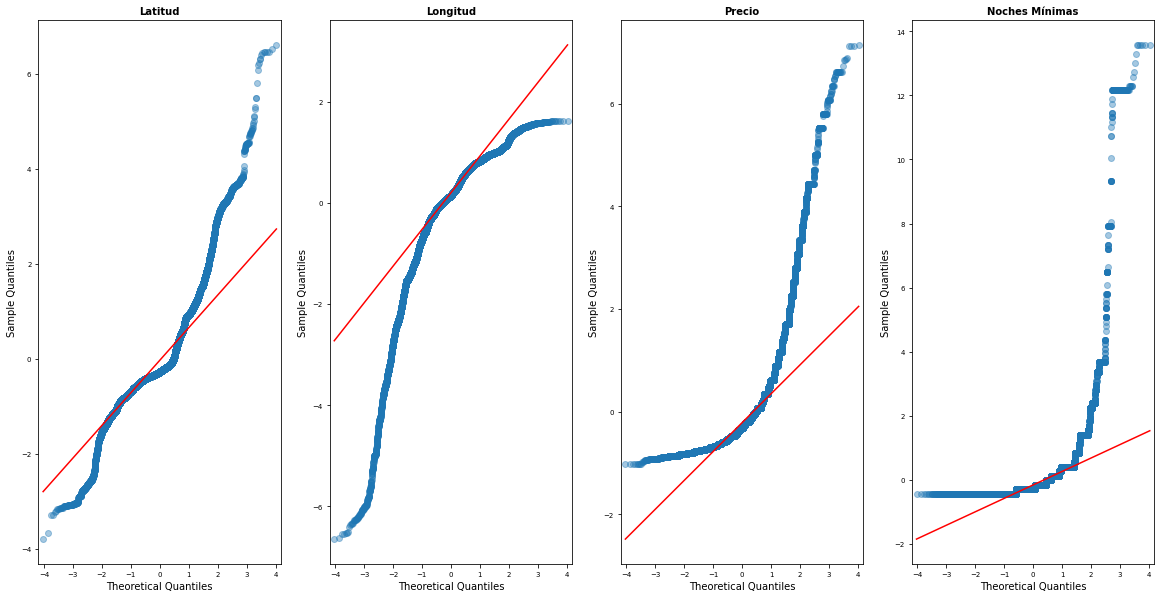

In [99]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

sm.qqplot(
    df_fil_noches_hc.latitude,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Latitud', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    df_fil_noches_hc.longitude,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Longitud', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

sm.qqplot(
    df_fil_noches_hc.price,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[2]
)
axs[2].set_title('Precio', fontsize = 10, fontweight = "bold")
axs[2].tick_params(labelsize = 7)

sm.qqplot(
    df_fil_noches_hc.minimum_nights,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[3]
)
axs[3].set_title('Noches Mínimas', fontsize = 10, fontweight = "bold")
axs[3].tick_params(labelsize = 7)


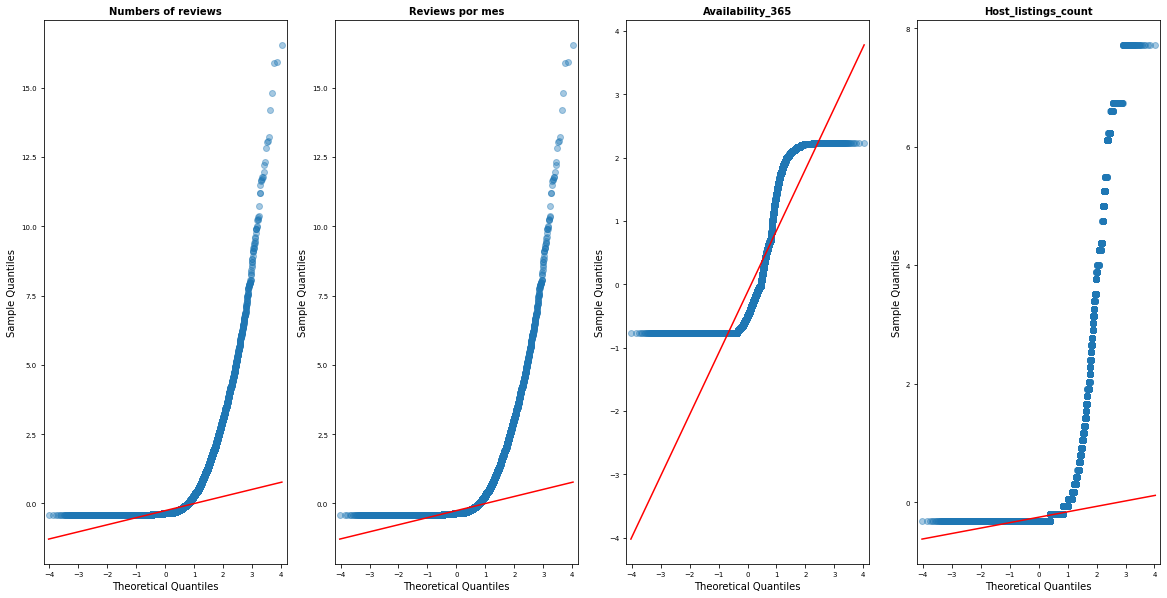

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

sm.qqplot(
    df_fil_noches_hc.number_of_reviews,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Numbers of reviews', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    df_fil_noches_hc.number_of_reviews,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Reviews por mes', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

sm.qqplot(
    df_fil_noches_hc.availability_365,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[2]
)
axs[2].set_title('Availability_365', fontsize = 10, fontweight = "bold")
axs[2].tick_params(labelsize = 7)

sm.qqplot(
    df_fil_noches_hc.calculated_host_listings_count,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[3]
)
axs[3].set_title('Host_listings_count', fontsize = 10, fontweight = "bold")
axs[3].tick_params(labelsize = 7)


In [101]:
numericas

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

* #### Prueba de Normalidad Shapiro-Wilk test  (`stats.shapiro`) 

In [102]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(df_fil_noches_hc.latitude)
print(f"Variable latitude: {shapiro_test}")
shapiro_test = stats.shapiro(df_fil_noches_hc.longitude)
print(f"Variable longitude: {shapiro_test}")
shapiro_test = stats.shapiro(df_fil_noches_hc.price)
print(f"Variable price: {shapiro_test}")
shapiro_test = stats.shapiro(df_fil_noches_hc.minimum_nights)
print(f"Variable minimum_nights: {shapiro_test}")
shapiro_test = stats.shapiro(df_fil_noches_hc.number_of_reviews)
print(f"Variable number_of_reviews: {shapiro_test}")
shapiro_test = stats.shapiro(df_fil_noches_hc.calculated_host_listings_count)
print(f"Variable calculated_host_listings_count: {shapiro_test}")
shapiro_test = stats.shapiro(df_fil_noches_hc.availability_365)
print(f"Variable availability_365: {shapiro_test}")

Variable latitude: ShapiroResult(statistic=0.8854122161865234, pvalue=0.0)
Variable longitude: ShapiroResult(statistic=0.8394477367401123, pvalue=0.0)
Variable price: ShapiroResult(statistic=0.7010080218315125, pvalue=0.0)
Variable minimum_nights: ShapiroResult(statistic=0.38234084844589233, pvalue=0.0)
Variable number_of_reviews: ShapiroResult(statistic=0.46346598863601685, pvalue=0.0)
Variable calculated_host_listings_count: ShapiroResult(statistic=0.3527429699897766, pvalue=0.0)
Variable availability_365: ShapiroResult(statistic=0.760971188545227, pvalue=0.0)


C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* **Si el *p-valor* es muy bajo, deberíamos rechazar la hipótesis nula. Es decir, la distribución no es normal.**
* "p-value may not be accurate for N > 5000."

* #### Prueba de Normalidad de los residuos D'Agostino's K-squared test  (`stats.normaltest`) 

In [103]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
shapiro_test = stats.normaltest(df_fil_noches_hc.latitude)
print(f"Variable latitude: {shapiro_test}")
shapiro_test = stats.normaltest(df_fil_noches_hc.longitude)
print(f"Variable longitude: {shapiro_test}")
shapiro_test = stats.normaltest(df_fil_noches_hc.price)
print(f"Variable price: {shapiro_test}")
shapiro_test = stats.normaltest(df_fil_noches_hc.minimum_nights)
print(f"Variable minimum_nights: {shapiro_test}")
shapiro_test = stats.normaltest(df_fil_noches_hc.number_of_reviews)
print(f"Variable number_of_reviews: {shapiro_test}")
shapiro_test = stats.normaltest(df_fil_noches_hc.calculated_host_listings_count)
print(f"Variable calculated_host_listings_count: {shapiro_test}")
shapiro_test = stats.normaltest(df_fil_noches_hc.availability_365)
print(f"Variable availability_365: {shapiro_test}")

Variable latitude: NormaltestResult(statistic=8340.006230650937, pvalue=0.0)
Variable longitude: NormaltestResult(statistic=15737.254863144653, pvalue=0.0)
Variable price: NormaltestResult(statistic=20961.42214543025, pvalue=0.0)
Variable minimum_nights: NormaltestResult(statistic=48175.64418316939, pvalue=0.0)
Variable number_of_reviews: NormaltestResult(statistic=35375.76792146952, pvalue=0.0)
Variable calculated_host_listings_count: NormaltestResult(statistic=33235.28991510051, pvalue=0.0)
Variable availability_365: NormaltestResult(statistic=5070.509202407376, pvalue=0.0)


# Estos datos no son normales!!!!

# ¿Qué hacemos???

#### Como gráficamente ninguna de nuestras variables numéricas presentan una distribución normal.

* Una opción es transformar los datos con el *logaritmo* (`statsmodels`) para ver si se ajustan así a una distribución normal

* #### Transformación logarítmica de los datos (`sm.qqplot` , `np.log`, `stats.shapiro`) 



C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable price: ShapiroResult(statistic=0.9857573509216309, pvalue=0.0)


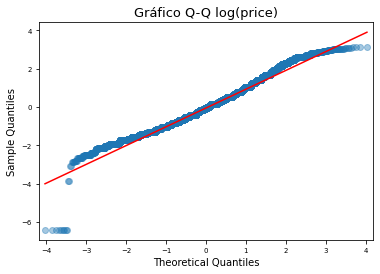

In [166]:
# Transformación logarítmica de los datos
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sm.qqplot(
    np.log1p(df_fil_noches_hc.price),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q log(price)', fontsize = 13)
ax.tick_params(labelsize = 7)


shapiro_test = stats.shapiro(np.log1p(df_fil_noches_hc.price))
print(f"Variable price: {shapiro_test}")

### Creamos una nueva columna con las varibles numericas transformadas por ´log1p`, si se ajustan 

# Intentamos hacer la transformación logarítmica de los datos para ver si se acercaban a una distribución normal.

* Nos sale el error: 
    **"The data contains non-finite values".**
    
* No sabemos como solucionarlo porque no tenemos datos nulos en Price.

In [ ]:
df_fil_noches_hc.price.isnull().sum()

In [ ]:
np.isfinite(df_fil_noches_hc['price'])

In [ ]:
df_fil_noches_hc.isnull().sum()

> ### 7.2. Coeficientes de correlación lineal 

#### Métodos de correlación de acuerdo al tipo de distribución de los datos:

* Si los datos no son **normales** tendremos que usar estadísticos **no paramétricos** adecuados para analizar datos que no se distribuyan normalmente.

* En el caso de los índices de correlación  ---> tendremos que usar **la correlación de Spearman**


#### Métodos de correlación:

* Cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

* Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

* Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

**0: asociación nula.**
**0.1: asociación pequeña.**
**0.3: asociación mediana.**
**0.5: asociación moderada.**
**0.7: asociación alta.**
**0.9: asociación muy alta.**

Hay tres coeficientes:

* **La correlación de Pearson** funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

* **La correlación de Spearman** se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

* **La correlación de Kendall** es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras. 


* ### Cálculo de correlación con Pandas (`.corr`) 

**Ejemplo**

print('Correlación Pearson: ', datos['weight'].corr(datos['height'], method='pearson'))
print('Correlación spearman: ', datos['weight'].corr(datos['height'], method='spearman'))
print('Correlación kendall: ', datos['weight'].corr(datos['height'], method='kendall'))

**Gráfica de la matriz de correlación, con el método elegido:**

corr = df.corr(method = 'spearman')
 sns.heatmap(corr, annot = True)
 plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [134]:
# df_reviews_per_month_filled
corr_matrix2 = df_reviews_per_month_filled[numericas].corr(method='spearman')
corr_matrix2

latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.127543  0.155205        0.004734   
longitude                       0.127543   1.000000  0.289142        0.220070   
price                           0.155205   0.289142  1.000000        0.196964   
minimum_nights                  0.004734   0.220070  0.196964        1.000000   
number_of_reviews               0.035376  -0.082093 -0.029829       -0.277546   
reviews_per_month               0.028483  -0.130301 -0.063884       -0.331512   
calculated_host_listings_count  0.011417  -0.128904  0.017367       -0.160417   
availability_365                0.098946  -0.113671  0.123769       -0.101113   

                                number_of_reviews  reviews_per_month  \
latitude                                 0.035376           0.028483   
longitude                               -0.082093          -0.130301   
price                                   -0.029829          -0.063884   
minimum_nights                          -0.277546          -0.331512   
number_of_reviews                        1.000000           0.912600   
reviews_per_month                        0.912600           1.000000   
calculated_host_listings_count           0.136439           0.181503   
availability_365                         0.238196           0.264692   

                                calculated_host_listings_count  \
latitude                                              0.011417   
longitude                                            -0.128904   
price                                                 0.017367   
minimum_nights                                       -0.160417   
number_of_reviews                                     0.136439   
reviews_per_month                                     0.181503   
calculated_host_listings_count                        1.000000   
availability_365                                      0.269652   

                                availability_365  
latitude                                0.098946  
longitude                              -0.113671  
price                                   0.123769  
minimum_nights                         -0.101113  
number_of_reviews                       0.238196  
reviews_per_month                       0.264692  
calculated_host_listings_count          0.269652  
availability_365                        1.000000

In [135]:
def tidy_corr_matrix(corr_mat2):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat2 = corr_mat2.stack().reset_index()
    corr_mat2.columns = ['variable_1','variable_2','r']
    corr_mat2 = corr_mat2.loc[corr_mat2['variable_1'] != corr_mat2['variable_2'], :]
    corr_mat2['abs_r'] = np.abs(corr_mat2['r'])
    corr_mat2 = corr_mat2.sort_values('abs_r', ascending=False)
    
    return(corr_mat2)

tidy_corr_matrix(corr_matrix2).head (12)
#tidy_corr_matrix(corr_matrix)

variable_1                      variable_2         r  \
37               number_of_reviews               reviews_per_month  0.912600   
44               reviews_per_month               number_of_reviews  0.912600   
29                  minimum_nights               reviews_per_month -0.331512   
43               reviews_per_month                  minimum_nights -0.331512   
10                       longitude                           price  0.289142   
17                           price                       longitude  0.289142   
35               number_of_reviews                  minimum_nights -0.277546   
28                  minimum_nights               number_of_reviews -0.277546   
55  calculated_host_listings_count                availability_365  0.269652   
62                availability_365  calculated_host_listings_count  0.269652   
47               reviews_per_month                availability_365  0.264692   
61                availability_365               reviews_per_month  0.264692   

       abs_r  
37  0.912600  
44  0.912600  
29  0.331512  
43  0.331512  
10  0.289142  
17  0.289142  
35  0.277546  
28  0.277546  
55  0.269652  
62  0.269652  
47  0.264692  
61  0.264692

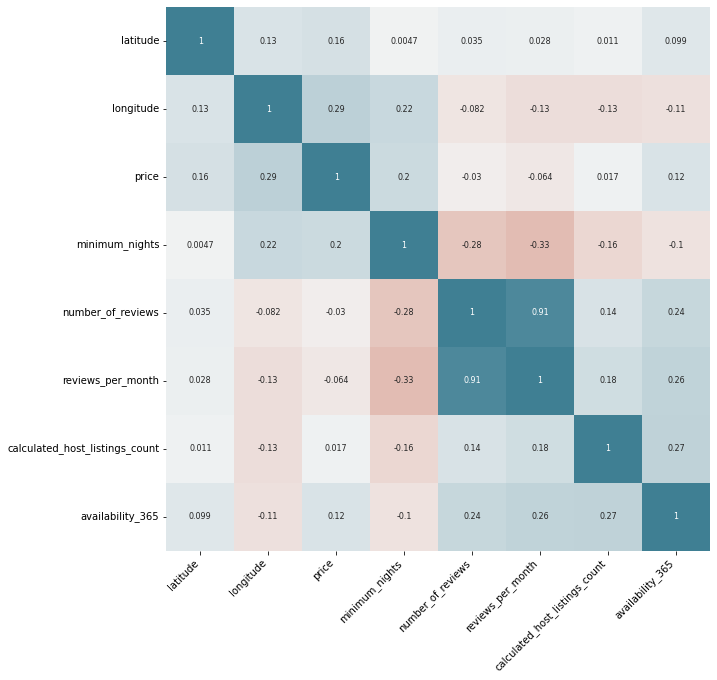

In [136]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix2,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

* ### Matriz de correlación

In [167]:
# Matriz de correlación con Pandas
# ==============================================================================
corr_matrix = df_fil_noches_hc[numericas].corr(method='pearson')
corr_matrix

latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.096966  0.207232       -0.010780   
longitude                       0.096966   1.000000  0.234138        0.055031   
price                           0.207232   0.234138  1.000000        0.036380   
minimum_nights                 -0.010780   0.055031  0.036380        1.000000   
number_of_reviews              -0.007235  -0.023766 -0.066696       -0.108507   
reviews_per_month              -0.029988  -0.109192 -0.080714       -0.161426   
calculated_host_listings_count  0.014666  -0.042417  0.132426        0.002229   
availability_365                0.107272  -0.148432  0.110987        0.026418   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.007235          -0.029988   
longitude                               -0.023766          -0.109192   
price                                   -0.066696          -0.080714   
minimum_nights                          -0.108507          -0.161426   
number_of_reviews                        1.000000           0.601755   
reviews_per_month                        0.601755           1.000000   
calculated_host_listings_count           0.009063           0.067438   
availability_365                         0.179924           0.135780   

                                calculated_host_listings_count  \
latitude                                              0.014666   
longitude                                            -0.042417   
price                                                 0.132426   
minimum_nights                                        0.002229   
number_of_reviews                                     0.009063   
reviews_per_month                                     0.067438   
calculated_host_listings_count                        1.000000   
availability_365                                      0.147075   

                                availability_365  
latitude                                0.107272  
longitude                              -0.148432  
price                                   0.110987  
minimum_nights                          0.026418  
number_of_reviews                       0.179924  
reviews_per_month                       0.135780  
calculated_host_listings_count          0.147075  
availability_365                        1.000000

* ### Matriz de correlación en formato de tabla larga (tidy)

Las matrices de correlación tienen el inconveniente de tener un tamaño notable cuando se dispone de muchas variables. Para facilitar la identificación de pares de variables con correlaciones altas, es conveniente convertirlas en formato de tabla larga (tidy).

In [168]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head (12)
#tidy_corr_matrix(corr_matrix)

variable_1         variable_2         r     abs_r
37  number_of_reviews  reviews_per_month  0.601755  0.601755
44  reviews_per_month  number_of_reviews  0.601755  0.601755
17              price          longitude  0.234138  0.234138
10          longitude              price  0.234138  0.234138
2            latitude              price  0.207232  0.207232
16              price           latitude  0.207232  0.207232
60   availability_365  number_of_reviews  0.179924  0.179924
39  number_of_reviews   availability_365  0.179924  0.179924
29     minimum_nights  reviews_per_month -0.161426  0.161426
43  reviews_per_month     minimum_nights -0.161426  0.161426
15          longitude   availability_365 -0.148432  0.148432
57   availability_365          longitude -0.148432  0.148432

* ### Heatmap matriz de correlaciones

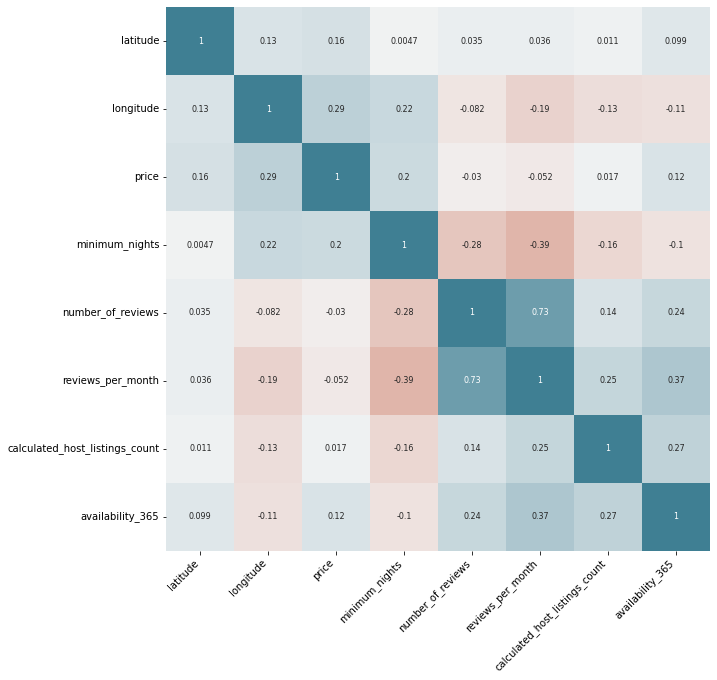

In [139]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

* ### Cálculo de correlación y significancia con Scipy

**`Scypy.stats`**

* La implementación de **`Scypy.stats`** sí permite calcular la significancia estadística además del coeficiente de correlación. 
* La función `stats.pearsonr()`----> devuelve un error si alguna de las observaciones contienen valores **NA/null**. 
* Las funciones `stats.spearmanr()` y `stats.kendalltau()` sí permiten excluirlos de forma automática si se indica `nan_policy='omit'`.

In [ ]:
df_fil_noches_hc.head(1)

In [ ]:
r, p = stats.spearmanr(df_fil_noches_hc['reviews_per_month'], df_fil_noches_hc['minimum_nights'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

* ### Cálculo de correlación, significancia e intervalos con `pingouin`

**`pingouin`**

* La librería **`Pingouin`** tiene una de las implementaciones más completas.  
* Con la función `corr()` se obtiene ----> coeficiente de correlación, su significancia, intervalo de confianza y poder estadístico entre otros.

In [ ]:
display(pg.corr(df_fil_noches_hc['reviews_per_month'], df_fil_noches_hc['minimum_nights'], method='spearman'))

> ### 7.3. Regresión lineal

* Se realiza el análisis de **regresión lineal** para las variables que presentaron mayores coeficientes de correlación con el método de  *Spearman* (distribuón no paramétrica).
* Volvemos a observar los primeros *12* registros de la ónmatriz de correlaci (en el formato de tabla larga Tydy).

In [ ]:
tidy_corr_matrix(corr_matrix).head (20)

* De esta manera se realizó la regresión lineal gráfica a **10 pares de variables**, las que tienen los primeros 10 coeficientes de correlación un poco mas significativos.

* #### `regplot` ----> Traza el diagrama de dispersión más la línea de regresión ajustada para los datos.

<function matplotlib.pyplot.show(close=None, block=None)>

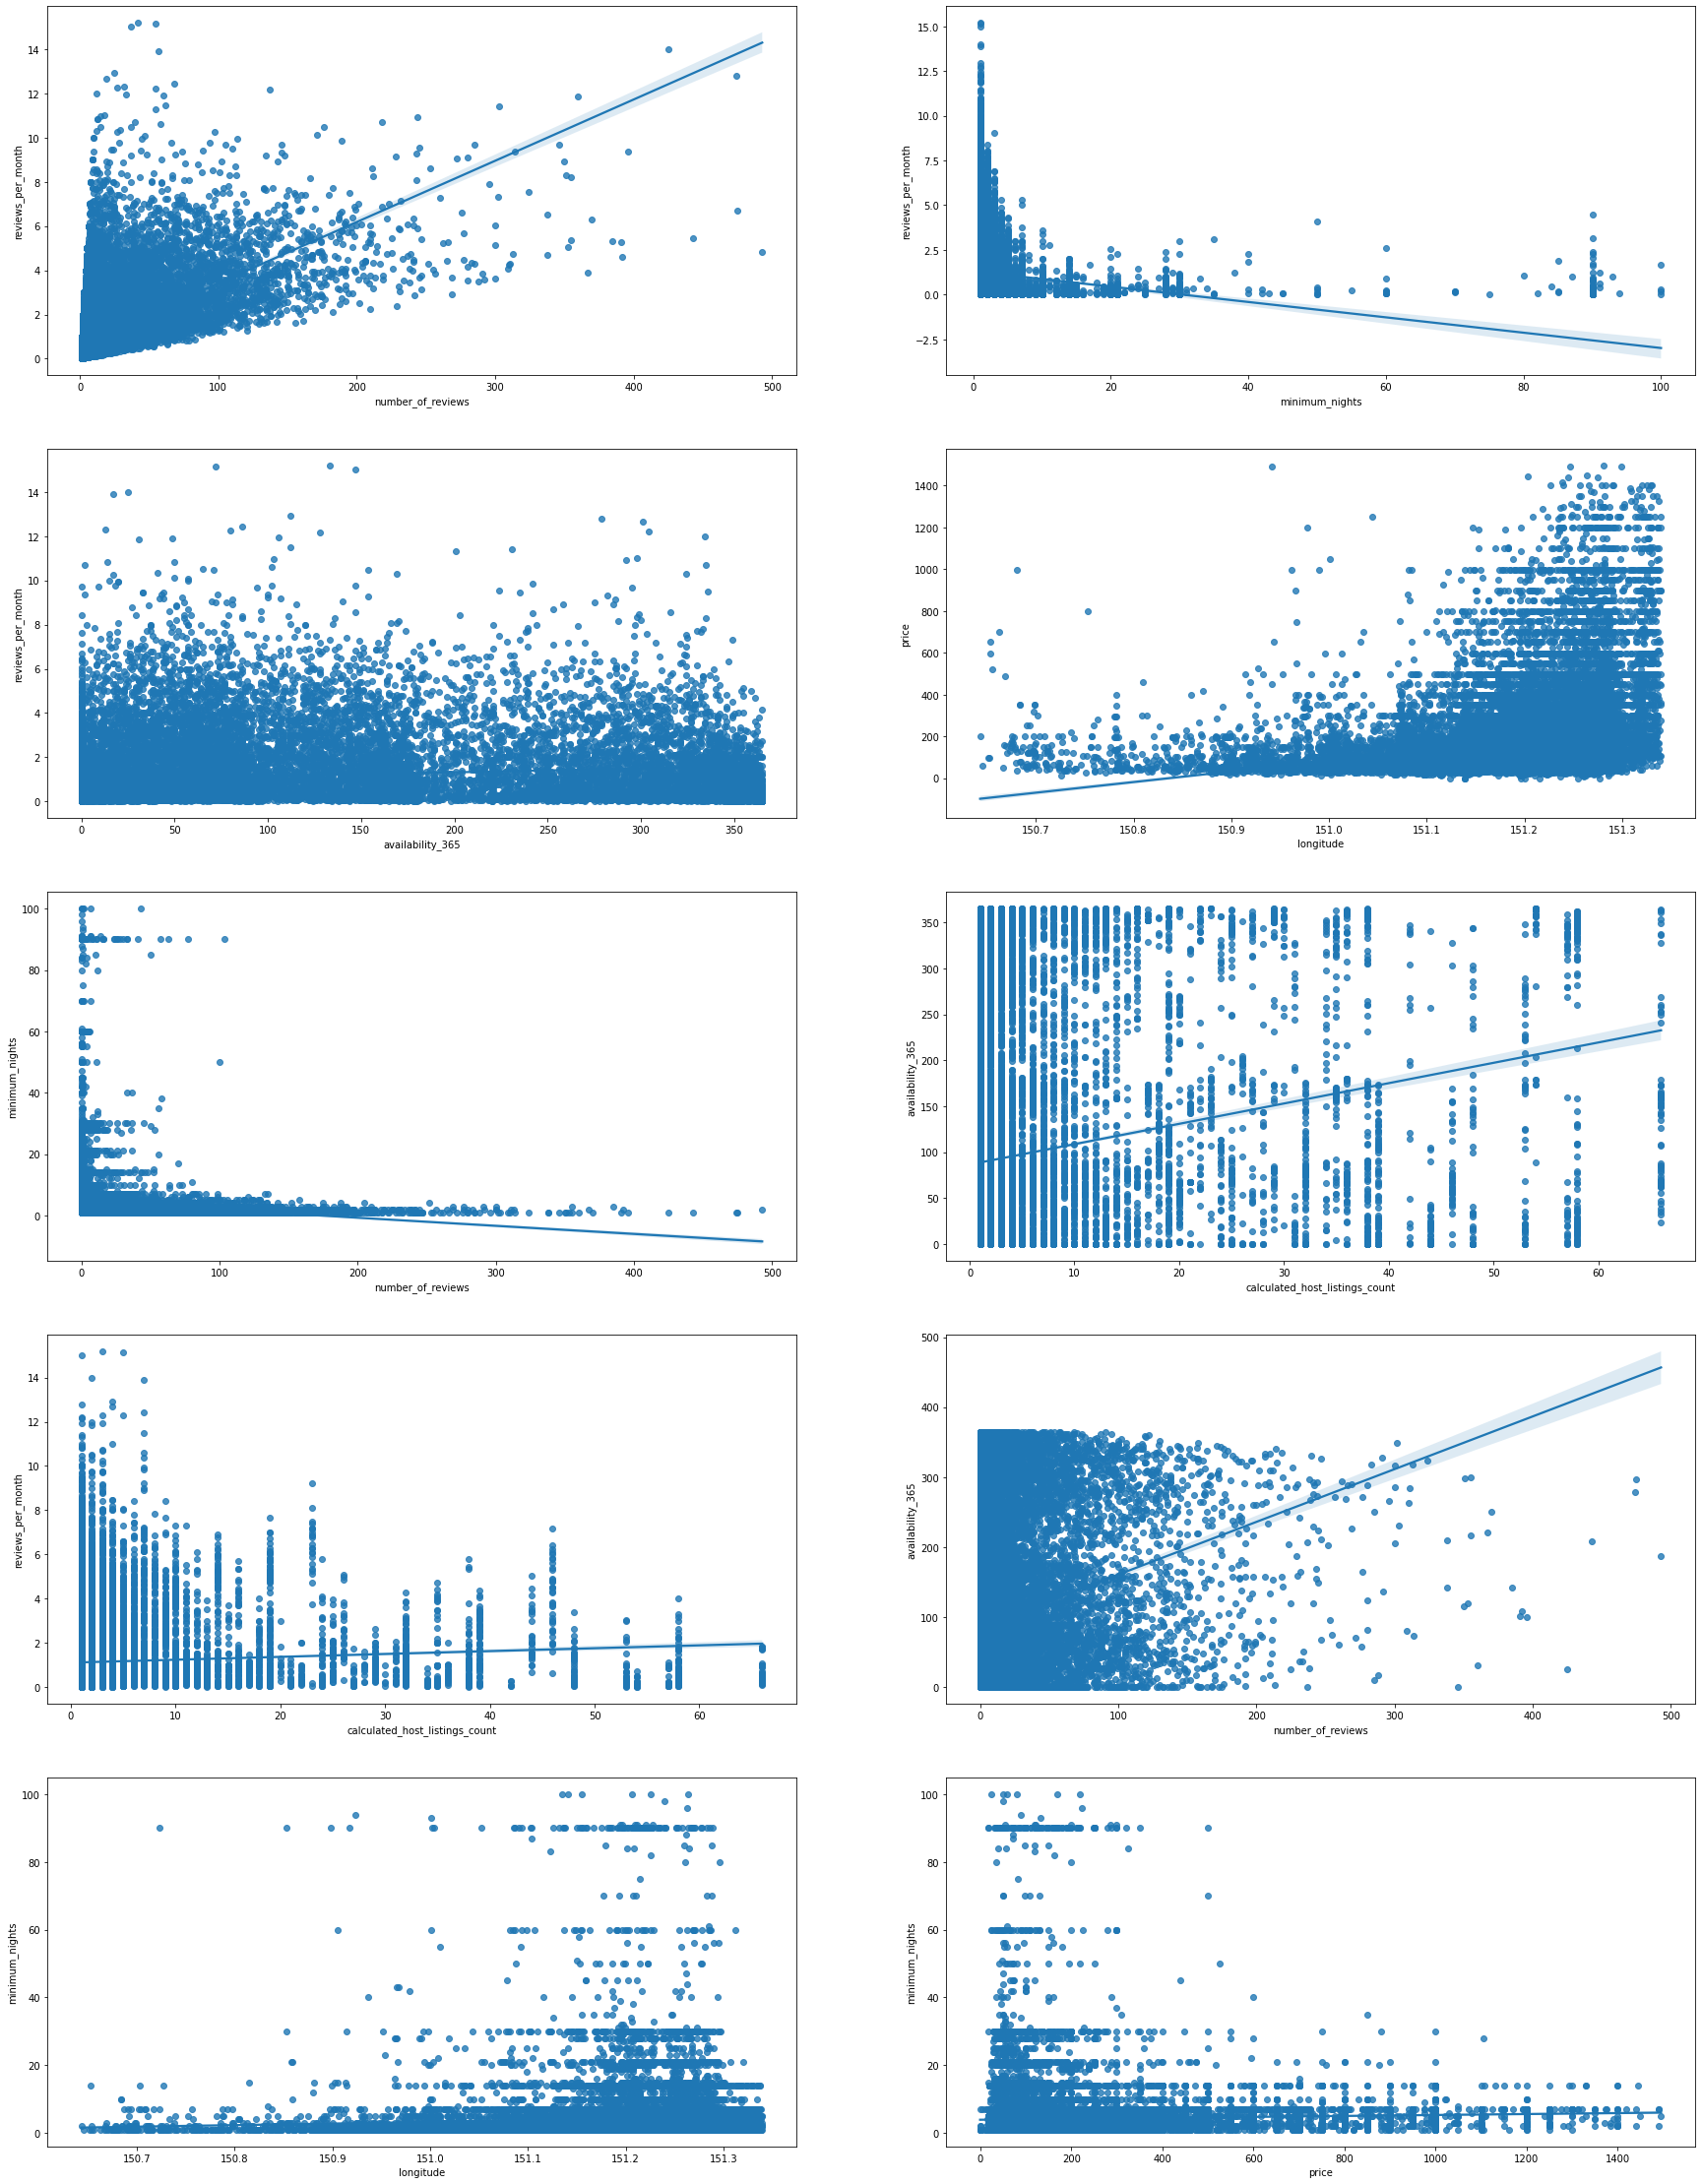

In [170]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 40))

plt.subplot(5,2,1)
sns.regplot(x="number_of_reviews", y="reviews_per_month", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,2)
sns.regplot(x="minimum_nights", y="reviews_per_month", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,3)
sns.regplot(x="availability_365", y="reviews_per_month", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,4)
sns.regplot(x="longitude", y="price", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,5)
sns.regplot(x="number_of_reviews", y="minimum_nights", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,6)
sns.regplot(x="calculated_host_listings_count", y="availability_365", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,7)
sns.regplot(x="calculated_host_listings_count", y="reviews_per_month", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,8)
sns.regplot(x="number_of_reviews", y="availability_365", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,9)
sns.regplot(x="longitude", y="minimum_nights", data=df_fil_noches_hc)
plt.ylim()

plt.subplot(5,2,10)
sns.regplot(x="price", y="minimum_nights", data=df_fil_noches_hc)
plt.ylim()

plt.show


* ### Modelos de regresion lineal y predicciones ----> y = mX + b

**X** = variable X

**Y**= variable a predecir

**m**= Coeficiente

**b**= Término independiente


* **Coefficients: `\n', regr.coef`** --------> coeficientes obtenidos (Tangente) 

* **'Independent term: `\n', regr.intercept`** --------> Este es el valor donde corta el eje Y (en X=0)

* **"Mean squared error: `%.2f" % mean_squared_error(y_train, y_pre)`** -------->  Error Cuadrado Medio

* **'Variance score: %.2f' % r2_score(y_train, y_pred)** --------> Puntaje de Varianza. El mejor puntaje es un 1.0



In [171]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Todas las regresiones de `reviews_per_month` hay que hacerlas haciendo el drop de las filas que no tienen datos.

In [172]:
tidy_corr_matrix(corr_matrix).head (20)

variable_1                      variable_2         r  \
37               number_of_reviews               reviews_per_month  0.601755   
44               reviews_per_month               number_of_reviews  0.601755   
17                           price                       longitude  0.234138   
10                       longitude                           price  0.234138   
2                         latitude                           price  0.207232   
16                           price                        latitude  0.207232   
60                availability_365               number_of_reviews  0.179924   
39               number_of_reviews                availability_365  0.179924   
29                  minimum_nights               reviews_per_month -0.161426   
43               reviews_per_month                  minimum_nights -0.161426   
15                       longitude                availability_365 -0.148432   
57                availability_365                       longitude -0.148432   
55  calculated_host_listings_count                availability_365  0.147075   
62                availability_365  calculated_host_listings_count  0.147075   
47               reviews_per_month                availability_365  0.135780   
61                availability_365               reviews_per_month  0.135780   
50  calculated_host_listings_count                           price  0.132426   
22                           price  calculated_host_listings_count  0.132426   
23                           price                availability_365  0.110987   
58                availability_365                           price  0.110987   

       abs_r  
37  0.601755  
44  0.601755  
17  0.234138  
10  0.234138  
2   0.207232  
16  0.207232  
60  0.179924  
39  0.179924  
29  0.161426  
43  0.161426  
15  0.148432  
57  0.148432  
55  0.147075  
62  0.147075  
47  0.135780  
61  0.135780  
50  0.132426  
22  0.132426  
23  0.110987  
58  0.110987

* ### Modelo de regresion lineal ----> Longitud vs Precio

In [173]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df_fil_noches_hc[["longitude"]]
X_train = np.array(dataX)
y_train = df_fil_noches_hc['price'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [508.9204476]
Independent term: 
 -76763.52616938886
Mean squared error: 31715.32
Variance score: 0.05


* ### Modelo de regresion lineal  ----> Precio (Y) = 508.92X + (-76763.52)
**y = mX + b**
**X** = Longitud

**Y**= Precio

**m**= Coeficiente

**b**= Término independiente
**Nota**: 
*  Error Cuadrático medio enorme
* Varianza muy alejada de 1

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
#y_Dosmil = regr.predict([[2000]])
#print(int(y_Dosmil))

* ### Predicción Precio con base a longitud

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df_fil_noches_hc[["calculated_host_listings_count"]]
X_train = np.array(dataX)
y_train = df_fil_noches_hc['availability_365'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df_fil_noches_hc[["longitude"]]
X_train = np.array(dataX)
y_train = df_fil_noches_hc['minimum_nights'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df_fil_noches_hc[["price"]]
X_train = np.array(dataX)
y_train = df_fil_noches_hc['minimum_nights'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

* ### y = mX + b ----> Min. Noches (Y) = 0.00140136X + (3.918631186710407)

**X** = Precio

**Y**= Min. Noches

**m**= Coeficiente

**b**= Término independiente

**Nota**: 
*  Error Cuadrático medio enorme
* Varianza muy alejada de 1

* ### Predicción Min. Noches con base a Precio

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

# Chicos diganme que variables quieren predecir y con base en que variable y asi definimos los modelos a presentar en este ejercicio. 

# 8. Gráficos y tablas para usar en el Streamlit

## Hay que hacer un DataFrame con "reviews_per_month ", "availability_365", "minimum_nights"

In [ ]:
st = df_fil_noches_hc.loc[:, ['reviews_per_month', 'availability_365', 'minimum_nights']] 
st.info()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

st["minimum_nights"].plot(color="red", ax=ax2, lw=2)
st["availability_365"].plot(kind='bar', width=0.9,  ax=ax1)

ax2.set_ylim(0,  40)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.suptitle("Sidney AirBnB")
ax2.set_ylabel("minimum_nights")
ax1.set_ylabel("availability_365")

plt.show()

# 8. Mapa interactivo de Sydney Australia (follium)

plt.figure(figsize=(14,10))
sns.heatmap(df_fil_noches_hc[numericas].corr(), anno----t=True)

In [ ]:
import streamlit as st
from streamlit_folium import st_folium
import folium as folium

**Stamen Terrain (tesela raster)**

  **Stamen Toner (tesela raster)**

tiles='Stamen Terrain'

tiles='Stamen Toner'

tiles='OpenStreetMap' 

> *Mapeo de ubicaciones de los inmuebles AirBnB a arrendar en Sidney*

* **Información de Sydney Australia**

*Coordenadas geográficas de Sídney* 	

Latitud: -33.8667, 

Longitud: 151.2 33° 52′ 0″ Sur, 
          151° 12′ 0″ Este

import folium

m = folium.Map(location=[-33.8667,151.2])
m

* **Ejemplo de mapa de Sidney con un único marcador de la Ópera de Sidney.**

In [ ]:
m = folium.Map(
    location=[-33.86785,151.20732],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker([-33.8567844, 151.2152967], popup='Ópera de Sidney', tooltip='Ópera de Sidney').add_to(m)


m


#Ópera de Sidney

#Latitud: -33.8567844. Longitud: 151.2152967 


* **Este sería el ócdigo para que muestre todos los marcadores de la base de datos de AirBnB de Sidney.**

* **Este codigo demora mucho en correr, en realidad no termina de correr.**

* **Si colocamos un condicional `ìf` con alguna otra variable, si que lo gramos visualizar los marcadores bajo el filtro del condicional (porque son mucho menos datos)**

map = folium.Map(
    location=[-33.86785,151.20732],
    zoom_start=12,
    tiles='Stamen Terrain'
)

for index, row in df.iterrows():
        tooltip = row['name']
        map.add_child(folium.Marker((row['latitude'], row['longitude']), popup=row['name'], tooltip=tooltip).add_to(map))
        
map
       


In [ ]:
m = folium.Map(
    location=[-33.86785,151.20732],
    zoom_start=12,
    tiles='Stamen Terrain'
)

for index, row in df.iterrows():
    if row["neighbourhood"]=="Manly":
        tooltip = row['name']
        m.add_child(folium.Marker((row['latitude'], row['longitude']), popup=row['name'], tooltip=tooltip).add_to(m))

m

### Tablero de trabajo (desarrollo del proyecto) : Link Trello

### Panel de Visualización de datos (link Streamlit)